## House Price Prediction - Assignment Solution

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation


## 1. Data Understanding and Exploration

Importing and understanding Dataset

In [1]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings('ignore')

In [2]:
master = pd.read_csv(r'C:\Users\320059088\Documents\UPGRAD\June\Course 4 - Machine Learning -2\Advanced Regression\Assignment\train.csv')

In [3]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
master.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL        65.00     8450   Pave   NaN      Reg   
1   2          20       RL        80.00     9600   Pave   NaN      Reg   
2   3          60       RL        68.00    11250   Pave   NaN      IR1   
3   4          70       RL        60.00     9550   Pave   NaN      IR1   
4   5          60       RL        84.00    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

#### Understanding the Data Dictionary
Understanding Data Dictiionary and Converting Features to Relevant Data Types

In [5]:
master['MSSubClass'] =master['MSSubClass'].astype('category')
master['OverallQual'] =master['OverallQual'].astype('category')
master['OverallCond'] =master['OverallCond'].astype('category')
master['BsmtFullBath'] =master['BsmtFullBath'].astype('category')
master['BsmtHalfBath'] =master['BsmtHalfBath'].astype('category')
master['FullBath'] =master['FullBath'].astype('category')
master['HalfBath'] =master['HalfBath'].astype('category')
master['BedroomAbvGr'] =master['BedroomAbvGr'].astype('category')
master['KitchenAbvGr'] =master['KitchenAbvGr'].astype('category')
master['TotRmsAbvGrd'] = master['TotRmsAbvGrd'].astype('category')
master['Fireplaces'] =master['Fireplaces'].astype('category')
master['GarageCars'] =master['GarageCars'].astype('category')
master['MoSold'] =master['MoSold'].astype('category')

In [6]:
master['YearBuilt']=pd.DatetimeIndex(master['YearBuilt']).year
master['YearRemodAdd']=pd.DatetimeIndex(master['YearRemodAdd']).year
master['YrSold']=pd.DatetimeIndex(master['YrSold']).year
master['GarageYrBlt']=pd.DatetimeIndex(master['GarageYrBlt']).year

In [7]:
master['Age']=pd.DatetimeIndex(master['YrSold']).year - pd.DatetimeIndex(master['YearBuilt']).year
master['Age'].value_counts()

0    1460
Name: Age, dtype: int64

In [8]:
dd= master[['YearBuilt','YrSold','Age']]
dd.describe()

YearBuilt  YrSold     Age
count    1460.00 1460.00 1460.00
mean     1970.00 1970.00    0.00
std         0.00    0.00    0.00
min      1970.00 1970.00    0.00
25%      1970.00 1970.00    0.00
50%      1970.00 1970.00    0.00
75%      1970.00 1970.00    0.00
max      1970.00 1970.00    0.00

All Houses Sold in the Same Year as Built 
- All House Age - 0

In [9]:
master['YearBuilt'] = master['YearBuilt'].astype('category')
master['YearRemodAdd'] = master['YearRemodAdd'].astype('category')
master['YrSold'] = master['YrSold'].astype('category')
master['GarageYrBlt'] = master['GarageYrBlt'].astype('category')
master['Age'] = master['Age'].astype('category')

#### Data Exploration

To perform linear regression:-

The (numeric) *target variable* should be linearly related to *at least one another numeric variable*. 

Let's see whether that's true in this case.

We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [10]:
master_numeric = master.select_dtypes(include=['float64', 'int64'])
master_numeric = master_numeric.drop(columns=['Id'])
master_numeric.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'],
      dtype='object')

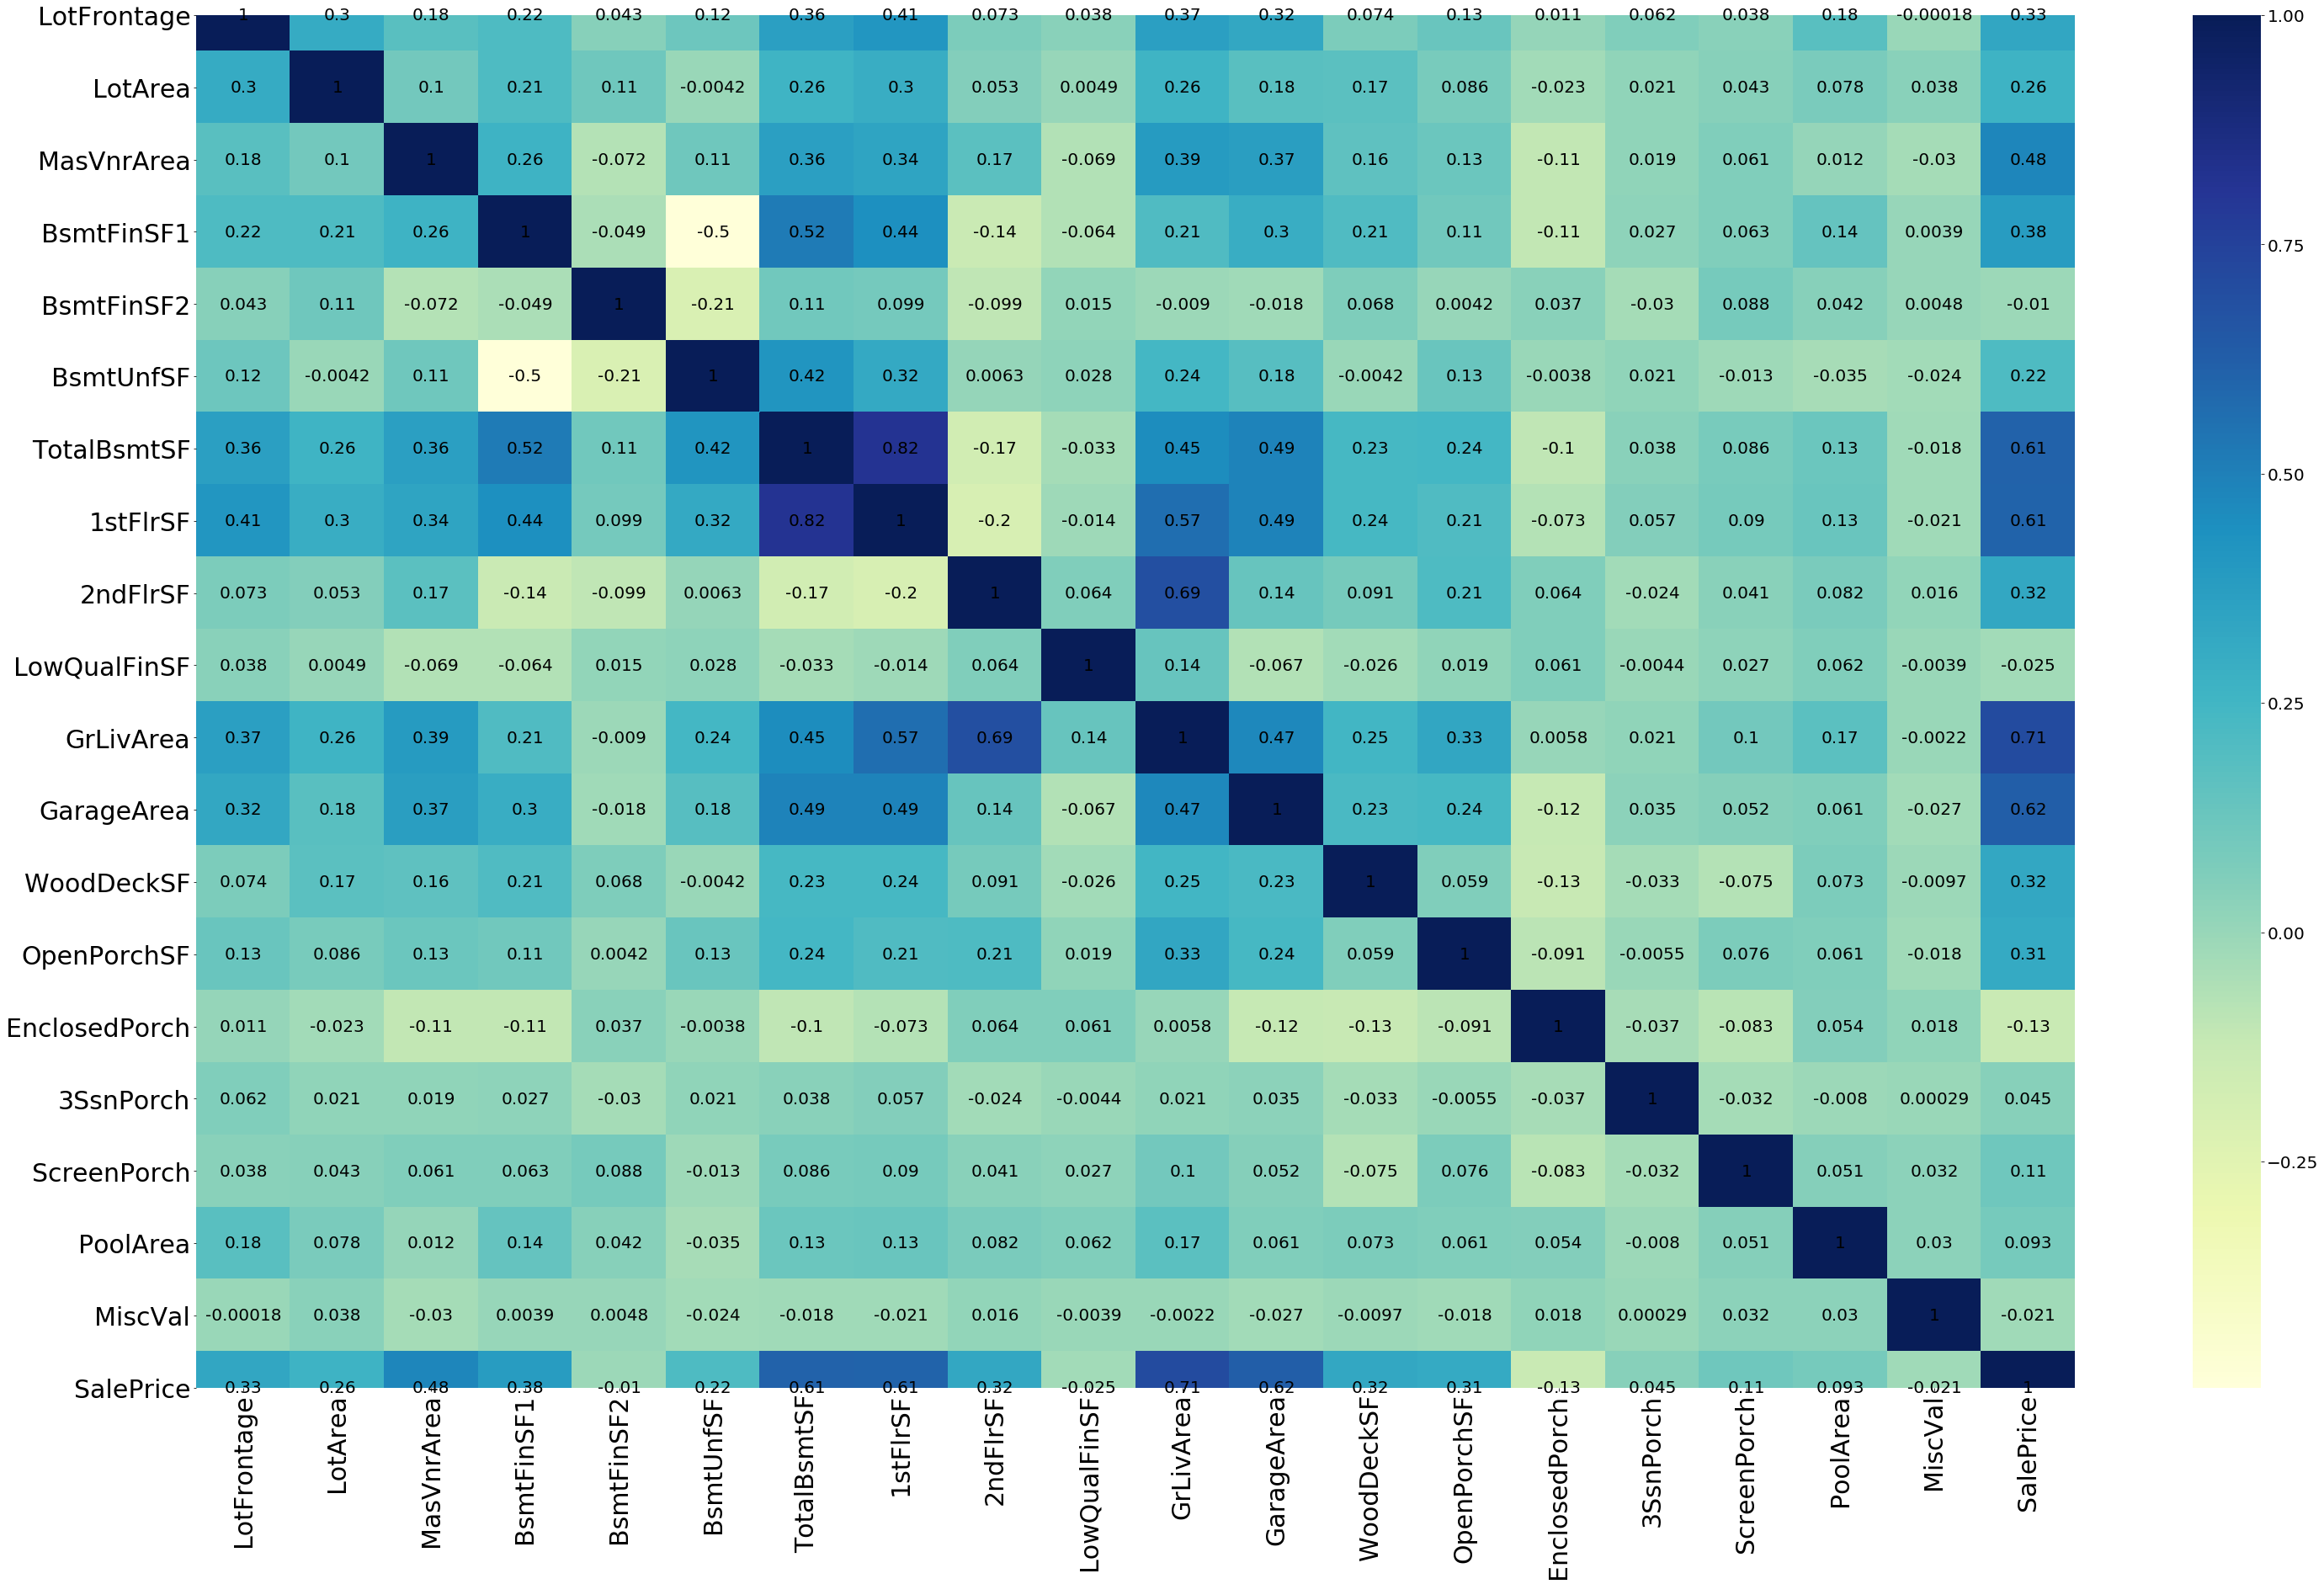

In [178]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(50,30))
ax = sns.heatmap(master_numeric.corr(), annot=True, cmap="YlGnBu", annot_kws={"size": 20, "color": 'Black'})
ax.xaxis.set_tick_params(labelsize=30, rotation = 90)
ax.yaxis.set_tick_params(labelsize=30, rotation = 0)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
plt.show()
# Run the Cell Again if No Output in first Run 

The heatmap shows some useful insights:

Correlation of price with independent variables:
- Price is highly (positively) correlated with ```GrLivArea```, ```GarageArea```, ```1stFlSF```, ```TotalBsmtSF```

Correlation among independent variables:
- Many independent variables are highly correlated enginesize etc. are all measures of 'Area', and are positively correlated 

In [12]:
master_cats = master.select_dtypes(include=['object'])
cat_cols = master_cats.columns
for col in cat_cols:
    master[col] = master[col].astype('category')
master.info()

master_categorical = master.select_dtypes(include=['category'])
master_categorical.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null category
MSZoning         1460 non-null category
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null category
Alley            91 non-null category
LotShape         1460 non-null category
LandContour      1460 non-null category
Utilities        1460 non-null category
LotConfig        1460 non-null category
LandSlope        1460 non-null category
Neighborhood     1460 non-null category
Condition1       1460 non-null category
Condition2       1460 non-null category
BldgType         1460 non-null category
HouseStyle       1460 non-null category
OverallQual      1460 non-null category
OverallCond      1460 non-null category
YearBuilt        1460 non-null category
YearRemodAdd     1460 non-null category
RoofStyle        1460 non-null category
RoofMatl         1460 

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'Age'],
      dtype='object')

## 2. Data Cleaning

In [13]:
percent_missing = master.isnull().sum() * 100 / len(master)
percent_missing = percent_missing.sort_values(ascending = False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(percent_missing)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageQual       5.55
GarageCond       5.55
GarageFinish     5.55
GarageType       5.55
GarageYrBlt      5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
RoofStyle        0.00
RoofMatl         0.00
ExterQual        0.00
Exterior1st      0.00
Exterior2nd      0.00
YearBuilt        0.00
ExterCond        0.00
Foundation       0.00
YearRemodAdd     0.00
Age              0.00
OverallCond      0.00
Utilities        0.00
MSSubClass       0.00
MSZoning         0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
LotConfig        0.00
OverallQual      0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
BsmtFinSF1

In [14]:
# Dropping Columns as Over 80% Missing Information
master= master.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'])
percent_missing = master.isnull().sum() * 100 / len(master)
percent_missing = percent_missing.sort_values(ascending = False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(percent_missing)

FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
Exterior2nd      0.00
YearBuilt        0.00
Exterior1st      0.00
RoofMatl         0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
RoofStyle        0.00
YearRemodAdd     0.00
Age              0.00
OverallCond      0.00
Utilities        0.00
MSSubClass       0.00
MSZoning         0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
LotConfig        0.00
OverallQual      0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
BsmtFinSF1       0.00
Heating          0.00
BsmtFinSF2       0.00
3SsnPorch        0.00
GarageCars

- Imputing Other Missing Values

In [15]:
print(master['FireplaceQu'].isnull().sum())
master['FireplaceQu'].value_counts()

690


Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [16]:
master['FireplaceQu']= master['FireplaceQu'].replace(['Fa','Ex','Po'],['Othr','Othr','Othr'])
master['FireplaceQu'] = master['FireplaceQu'].fillna('NA')
master['FireplaceQu']= master['FireplaceQu'].astype('category')
print(master['FireplaceQu'].isnull().sum())
master['FireplaceQu'].value_counts()

0


NA      690
Gd      380
TA      313
Othr     77
Name: FireplaceQu, dtype: int64

In [17]:
master['LotFrontage'].dtype

dtype('float64')

In [18]:
master['LotFrontage'] = master['LotFrontage'].fillna(master['LotFrontage'].median())
print(master['LotFrontage'].isnull().sum())

0


In [19]:
percent_missing = master.isnull().sum() * 100 / len(master)
percent_missing = percent_missing.sort_values(ascending = False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(percent_missing)

GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
BsmtFinType2    2.60
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtCond        2.53
BsmtQual        2.53
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
YearBuilt       0.00
Exterior2nd     0.00
ExterQual       0.00
ExterCond       0.00
Exterior1st     0.00
RoofMatl        0.00
Foundation      0.00
BsmtFinSF1      0.00
RoofStyle       0.00
YearRemodAdd    0.00
Age             0.00
OverallCond     0.00
OverallQual     0.00
MSSubClass      0.00
MSZoning        0.00
LotFrontage     0.00
LotArea         0.00
Street          0.00
LotShape        0.00
LandContour     0.00
Utilities       0.00
LotConfig       0.00
LandSlope       0.00
Neighborhood    0.00
Condition1      0.00
Condition2      0.00
BldgType        0.00
BsmtFinSF2      0.00
HouseStyle      0.00
Heating         0.00
BsmtUnfSF       0.00
3SsnPorch       0.00
GarageCars      0.00
GarageArea      0.00
PavedDrive   

In [20]:
master['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [21]:
master['GarageType'] = master['GarageType'].fillna(master['GarageType'].mode()[0])
master['GarageYrBlt'] = master['GarageYrBlt'].fillna(master['GarageYrBlt'].mode()[0])
master['GarageFinish'] = master['GarageFinish'].fillna(master['GarageFinish'].mode()[0])
master['GarageQual'] = master['GarageQual'].fillna(master['GarageQual'].mode()[0])
master['BsmtFinType2'] = master['BsmtFinType2'].fillna(master['BsmtFinType2'].mode()[0])
master['BsmtExposure'] = master['BsmtExposure'].fillna(master['BsmtExposure'].mode()[0])
master['BsmtQual'] = master['BsmtQual'].fillna(master['BsmtQual'].mode()[0])
master['GarageCond'] = master['GarageCond'].fillna(master['GarageCond'].mode()[0])
master['BsmtFinType1'] = master['BsmtFinType1'].fillna(master['BsmtFinType1'].mode()[0])
master['BsmtCond'] = master['BsmtCond'].fillna(master['BsmtCond'].mode()[0])

In [22]:
percent_missing = master.isnull().sum() * 100 / len(master)
percent_missing = percent_missing.sort_values(ascending = False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(percent_missing)

MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
Age             0.00
Foundation      0.00
RoofMatl        0.00
Exterior1st     0.00
Exterior2nd     0.00
ExterQual       0.00
ExterCond       0.00
BsmtQual        0.00
YearRemodAdd    0.00
BsmtCond        0.00
BsmtExposure    0.00
BsmtFinType1    0.00
BsmtFinSF1      0.00
BsmtFinType2    0.00
BsmtFinSF2      0.00
RoofStyle       0.00
YearBuilt       0.00
TotalBsmtSF     0.00
Utilities       0.00
MSSubClass      0.00
MSZoning        0.00
LotFrontage     0.00
LotArea         0.00
Street          0.00
LotShape        0.00
LandContour     0.00
LotConfig       0.00
OverallCond     0.00
LandSlope       0.00
Neighborhood    0.00
Condition1      0.00
Condition2      0.00
BldgType        0.00
HouseStyle      0.00
OverallQual     0.00
BsmtUnfSF       0.00
Heating         0.00
SalePrice       0.00
EnclosedPorch   0.00
GarageCars      0.00
GarageArea      0.00
GarageQual      0.00
GarageCond      0.00
PavedDrive      0.00
WoodDeckSF   

- Dropping Other 1.17% Missing Data of Entire Dataset as may not Result in Much Loss of Data

In [23]:
master=master.dropna()

In [24]:
percent_missing = master.isnull().sum() * 100 / len(master)
percent_missing = percent_missing.sort_values(ascending = False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(percent_missing)

Age             0.00
Foundation      0.00
RoofMatl        0.00
Exterior1st     0.00
Exterior2nd     0.00
MasVnrType      0.00
MasVnrArea      0.00
ExterQual       0.00
ExterCond       0.00
BsmtQual        0.00
YearRemodAdd    0.00
BsmtCond        0.00
BsmtExposure    0.00
BsmtFinType1    0.00
BsmtFinSF1      0.00
BsmtFinType2    0.00
BsmtFinSF2      0.00
BsmtUnfSF       0.00
RoofStyle       0.00
YearBuilt       0.00
SalePrice       0.00
Utilities       0.00
MSSubClass      0.00
MSZoning        0.00
LotFrontage     0.00
LotArea         0.00
Street          0.00
LotShape        0.00
LandContour     0.00
LotConfig       0.00
OverallCond     0.00
LandSlope       0.00
Neighborhood    0.00
Condition1      0.00
Condition2      0.00
BldgType        0.00
HouseStyle      0.00
OverallQual     0.00
TotalBsmtSF     0.00
Heating         0.00
HeatingQC       0.00
EnclosedPorch   0.00
GarageCars      0.00
GarageArea      0.00
GarageQual      0.00
GarageCond      0.00
PavedDrive      0.00
WoodDeckSF   

In [25]:
master.describe()

Id  LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
count 1451.00      1451.00   1451.00     1451.00     1451.00     1451.00   
mean   729.37        69.85  10507.81      103.76      442.27       46.84   
std    421.74        22.04   9992.99      181.11      455.37      161.78   
min      1.00        21.00   1300.00        0.00        0.00        0.00   
25%    364.50        60.00   7537.50        0.00        0.00        0.00   
50%    729.00        69.00   9477.00        0.00      381.00        0.00   
75%   1094.50        79.00  11600.00      166.00      707.00        0.00   
max   1460.00       313.00 215245.00     1600.00     5644.00     1474.00   

       BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  ...  GrLivArea  GarageArea  \
count    1451.00      1451.00   1451.00   1451.00  ...    1451.00     1451.00   
mean      567.20      1056.31   1161.55    346.74  ...    1514.17      472.53   
std       442.21       437.91    385.00    436.45  ...     525.80      214.17   
min         0.00         0.00    334.00      0.00  ...     334.00        0.00   
25%       222.00       795.00    882.00      0.00  ...    1128.00      327.50   
50%       479.00       991.00   1086.00      0.00  ...    1464.00      478.00   
75%       808.00      1297.50   1391.00    728.00  ...    1776.00      576.00   
max      2336.00      6110.00   4692.00   2065.00  ...    5642.00     1418.00   

       WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
count     1451.00      1451.00        1451.00    1451.00      1451.00   
mean        94.41        46.42          21.95       3.43        15.15   
std        125.44        66.06          61.11      29.41        55.92   
min          0.00         0.00           0.00       0.00         0.00   
25%          0.00         0.00           0.00       0.00         0.00   
50%          0.00        24.00           0.00       0.00         0.00   
75%        168.00        68.00           0.00       0.00         0.00   
max        857.00       547.00         552.00     508.00       480.00   

       PoolArea  MiscVal  SalePrice  
count   1451.00  1451.00    1451.00  
mean       2.78    43.76  180624.10  
std       40.30   497.65   79312.13  
min        0.00     0.00   34900.00  
25%        0.00     0.00  129900.00  
50%        0.00     0.00  162500.00  
75%        0.00     0.00  214000.00  
max      738.00 15500.00  755000.00  

[8 rows x 21 columns]

In [26]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 78 columns):
Id               1451 non-null int64
MSSubClass       1451 non-null category
MSZoning         1451 non-null category
LotFrontage      1451 non-null float64
LotArea          1451 non-null int64
Street           1451 non-null category
LotShape         1451 non-null category
LandContour      1451 non-null category
Utilities        1451 non-null category
LotConfig        1451 non-null category
LandSlope        1451 non-null category
Neighborhood     1451 non-null category
Condition1       1451 non-null category
Condition2       1451 non-null category
BldgType         1451 non-null category
HouseStyle       1451 non-null category
OverallQual      1451 non-null category
OverallCond      1451 non-null category
YearBuilt        1451 non-null category
YearRemodAdd     1451 non-null category
RoofStyle        1451 non-null category
RoofMatl         1451 non-null category
Exterior1st      145

- Grouping and Cleaning Other Features

In [27]:
master_categorical.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'Age'],
      dtype='object')

In [28]:
master['MSZoning'].value_counts()

RL         1145
RM          218
FV           62
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [29]:
master['MSZoning']= master['MSZoning'].replace(['FV','RH','C (all)'],['Othr','Othr','Othr'])
master['MSZoning'].value_counts()

RL      1145
RM       218
Othr      88
Name: MSZoning, dtype: int64

In [30]:
master['LotShape'].value_counts()

Reg    918
IR1    482
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [31]:
master['LotShape']= master['LotShape'].replace(['IR2','IR3'],['Othr','Othr'])
master['LotShape'].value_counts()

Reg     918
IR1     482
Othr     51
Name: LotShape, dtype: int64

In [32]:
master['LandContour'].value_counts()

Lvl    1302
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [33]:
master['LandContour']= master['LandContour'].replace(['Bnk','HLS','Low'],['Othr','Othr','Othr'])
master['LandContour'].value_counts()

Lvl     1302
Othr     149
Name: LandContour, dtype: int64

In [34]:
master['Utilities'].value_counts()

AllPub    1450
NoSeWa       1
Name: Utilities, dtype: int64

In [35]:
master['Utilities']= master['Utilities'].replace(['NoSeWa'],['AllPub'])

In [36]:
master['LotConfig'].value_counts()

Inside     1045
Corner      262
CulDSac      93
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [37]:
master['LotConfig']= master['LotConfig'].replace(['CulDSac','FR2','FR3'],['Othr','Othr','Othr'])
master['LotConfig'].value_counts()

Inside    1045
Corner     262
Othr       144
Name: LotConfig, dtype: int64

In [38]:
master['LandSlope'].value_counts()

Gtl    1373
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [39]:
master['LotConfig']= master['LotConfig'].replace(['Mod','Sev'],['Othr','Othr'])
master['LotConfig'].value_counts()

Inside    1045
Corner     262
Othr       144
Name: LotConfig, dtype: int64

In [40]:
master['Neighborhood'].value_counts()

NAmes      225
CollgCr    149
OldTown    113
Edwards    100
Somerst     83
Gilbert     78
NridgHt     76
Sawyer      74
NWAmes      73
BrkSide     58
SawyerW     58
Crawfor     50
Mitchel     49
NoRidge     41
Timber      37
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [41]:
master['Neighborhood']= master['Neighborhood'].replace(['Somerst','Gilbert','NridgHt','Sawyer','NWAmes','SawyerW','BrkSide','Crawfor','Mitchel','NoRidge','Timber','IDOTRR','ClearCr','SWISU','StoneBr','Blmngtn','MeadowV','BrDale','Veenker','NPkVill','Blueste'],
                                                       ['Othr','Othr','Othr','Othr','Othr','Othr','Othr','Othr','Othr','Othr','Othr','Othr','Othr','Othr','Othr','Othr','Othr','Othr','Othr','Othr','Othr'])
master['Neighborhood'].value_counts()

Othr       864
NAmes      225
CollgCr    149
OldTown    113
Edwards    100
Name: Neighborhood, dtype: int64

In [42]:
master['Condition1'].value_counts()

Norm      1251
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [43]:
master['Condition1']= master['Condition1'].replace(['Feedr','Artery','RRAn','PosN','RRAe','PosA','RRNn','RRNe'],
                                                       ['Othr','Othr','Othr','Othr','Othr','Othr','Othr','Othr'])
master['Condition1'].value_counts()

Norm    1251
Othr     200
Name: Condition1, dtype: int64

In [44]:
master['Condition2'].value_counts()

Norm      1436
Feedr        6
RRNn         2
PosN         2
Artery       2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64

In [45]:
master['Condition2']= master['Condition2'].replace(['Feedr','RRNn','PosN','PosN','Artery','RRAn','RRAe','PosA'],
                                                       ['Othr','Othr','Othr','Othr','Othr','Othr','Othr','Othr'])
master['Condition2'].value_counts()

Norm    1436
Othr      15
Name: Condition2, dtype: int64

In [46]:
master['BldgType'].value_counts()

1Fam      1212
TwnhsE     113
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [47]:
master['BldgType']= master['BldgType'].replace(['TwnhsE','Duplex','Twnhs','2fmCon'],
                                                       ['Othr','Othr','Othr','Othr'])
master['BldgType'].value_counts()

1Fam    1212
Othr     239
Name: BldgType, dtype: int64

In [48]:
master['HouseStyle'].value_counts()

1Story    721
2Story    442
1.5Fin    154
SLvl       64
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [49]:
master['HouseStyle']= master['HouseStyle'].replace(['SLvl','SFoyer','1.5Unf','2.5Unf','2.5Fin'],
                                                       ['Othr','Othr','Othr','Othr','Othr'])
master['HouseStyle'].value_counts()

1Story    721
2Story    442
1.5Fin    154
Othr      134
Name: HouseStyle, dtype: int64

In [50]:
master['YearBuilt'].value_counts()

1970    1451
Name: YearBuilt, dtype: int64

In [51]:
master['YearRemodAdd'].value_counts()

1970    1451
Name: YearRemodAdd, dtype: int64

In [52]:
master['RoofStyle'].value_counts()

Gable      1133
Hip         285
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [53]:
master['RoofStyle']= master['RoofStyle'].replace(['Hip','Flat','Gambrel','Mansard','Shed'],
                                                       ['Othr','Othr','Othr','Othr','Othr'])
master['RoofStyle'].value_counts()

Gable    1133
Othr      318
Name: RoofStyle, dtype: int64

In [54]:
master['RoofMatl'].value_counts()

CompShg    1425
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
Metal         1
Membran       1
ClyTile       1
Name: RoofMatl, dtype: int64

In [55]:
master['RoofMatl']= master['RoofMatl'].replace(['Tar&Grv','WdShngl','WdShake','Roll','Metal','Membran','ClyTile'],
                                                       ['Othr','Othr','Othr','Othr','Othr','Othr','Othr'])
master['RoofMatl'].value_counts()

CompShg    1425
Othr         26
Name: RoofMatl, dtype: int64

In [56]:
master['Exterior1st'].value_counts()

VinylSd    509
HdBoard    222
MetalSd    220
Wd Sdng    205
Plywood    108
CemntBd     59
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

In [57]:
master['Exterior1st']= master['Exterior1st'].replace(['CemntBd','BrkFace','WdShing','Stucco','AsbShng','Stone','BrkComm','ImStucc','CBlock','AsphShn'],
                                                       ['Othr','Othr','Othr','Othr','Othr','Othr','Othr','Othr','Othr','Othr'])
master['Exterior1st'].value_counts()

VinylSd    509
HdBoard    222
MetalSd    220
Wd Sdng    205
Othr       187
Plywood    108
Name: Exterior1st, dtype: int64

In [58]:
master['Exterior2nd'].value_counts()

VinylSd    498
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     58
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        4
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [59]:
master['Exterior2nd']= master['Exterior2nd'].replace(['CmentBd','Wd Shng','Stucco','BrkFace','AsbShng','ImStucc','Brk Cmn','Stone','AsphShn','Other','CBlock'],
                                                       ['Othr','Othr','Othr','Othr','Othr','Othr','Othr','Othr','Othr','Othr','Othr'])
master['Exterior2nd'].value_counts()

VinylSd    498
MetalSd    214
HdBoard    207
Wd Sdng    197
Othr       193
Plywood    142
Name: Exterior2nd, dtype: int64

In [60]:
master['MasVnrType'].value_counts()

None       863
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [61]:
master['ExterQual'].value_counts()

TA    905
Gd    481
Ex     51
Fa     14
Name: ExterQual, dtype: int64

In [62]:
master['ExterQual']= master['ExterQual'].replace(['Ex','Fa'],
                                                       ['Othr','Othr'])
master['ExterQual'].value_counts()

TA      905
Gd      481
Othr     65
Name: ExterQual, dtype: int64

In [63]:
master['ExterCond'].value_counts()

TA    1273
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [64]:
master['ExterCond']= master['ExterCond'].replace(['Fa','Ex','Po'],
                                                       ['Othr','Othr','Othr'])
master['ExterCond'].value_counts()

TA      1273
Gd       146
Othr      32
Name: ExterCond, dtype: int64

In [65]:
master['Foundation'].value_counts()

PConc     638
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [66]:
master['Foundation']= master['Foundation'].replace(['Slab','Stone','Wood'],
                                                       ['Othr','Othr','Othr'])
master['Foundation'].value_counts()

PConc     638
CBlock    634
BrkTil    146
Othr       33
Name: Foundation, dtype: int64

In [67]:
master['BsmtQual'].value_counts()

TA    685
Gd    611
Ex    120
Fa     35
Name: BsmtQual, dtype: int64

In [68]:
master['BsmtCond'].value_counts()

TA    1340
Gd      64
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [69]:
master['BsmtCond']= master['BsmtCond'].replace(['Gd','Fa','Po'],
                                                       ['Othr','Othr','Othr'])
master['BsmtCond'].value_counts()

TA      1340
Othr     111
Name: BsmtCond, dtype: int64

In [70]:
master['BsmtExposure'].value_counts()

No    983
Av    221
Gd    133
Mn    114
Name: BsmtExposure, dtype: int64

In [71]:
master['BsmtFinType1'].value_counts()

Unf    464
GLQ    413
ALQ    220
BLQ    148
Rec    132
LwQ     74
Name: BsmtFinType1, dtype: int64

In [72]:
master['BsmtFinType2'].value_counts()

Unf    1285
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [73]:
master['BsmtFinType2']= master['BsmtFinType2'].replace(['Rec','LwQ','BLQ','ALQ','GLQ'],
                                                       ['Othr','Othr','Othr','Othr','Othr'])
master['BsmtFinType2'].value_counts()

Unf     1285
Othr     166
Name: BsmtFinType2, dtype: int64

In [74]:
master['Heating'].value_counts()

GasA     1419
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [75]:
master['Heating']= master['Heating'].replace(['GasW','Grav','Wall','OthW','Floor'],
                                                       ['Othr','Othr','Othr','Othr','Othr'])
master['Heating'].value_counts()

GasA    1419
Othr      32
Name: Heating, dtype: int64

In [76]:
master['HeatingQC'].value_counts()

Ex    734
TA    427
Gd    240
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [77]:
master['HeatingQC']= master['HeatingQC'].replace(['TA','Gd','Fa','Po'],
                                                       ['Othr','Othr','Othr','Othr'])
master['HeatingQC'].value_counts()

Ex      734
Othr    717
Name: HeatingQC, dtype: int64

In [78]:
master['CentralAir'].value_counts()

Y    1356
N      95
Name: CentralAir, dtype: int64

In [79]:
master['Electrical'].value_counts()

SBrkr    1326
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [80]:
master['Electrical']= master['Electrical'].replace(['FuseA','FuseF','FuseP','Mix'],
                                                       ['Othr','Othr','Othr','Othr'])
master['Electrical'].value_counts()

SBrkr    1326
Othr      125
Name: Electrical, dtype: int64

In [81]:
master['KitchenQual'].value_counts()

TA    734
Gd    579
Ex     99
Fa     39
Name: KitchenQual, dtype: int64

In [82]:
master['Functional'].value_counts()

Typ     1352
Min2      34
Min1      31
Mod       15
Maj1      13
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [83]:
master['Functional']= master['Functional'].replace(['Min2','Min1','Mod','Maj1','Maj2','Sev'],
                                                       ['Othr','Othr','Othr','Othr','Othr','Othr'])
master['Functional'].value_counts()

Typ     1352
Othr      99
Name: Functional, dtype: int64

In [84]:
master['KitchenQual'].value_counts()

TA    734
Gd    579
Ex     99
Fa     39
Name: KitchenQual, dtype: int64

In [85]:
master['GarageType'].value_counts()

Attchd     944
Detchd     387
BuiltIn     86
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [86]:
master['GarageType']= master['GarageType'].replace(['BuiltIn','Basment','CarPort','2Types'],
                                                       ['Othr','Othr','Othr','Othr'])
master['GarageType'].value_counts()

Attchd    944
Detchd    387
Othr      120
Name: GarageType, dtype: int64

In [87]:
master['GarageYrBlt'].value_counts()

1970.00    1451
Name: GarageYrBlt, dtype: int64

In [88]:
master['GarageFinish'].value_counts()

Unf    686
RFn    418
Fin    347
Name: GarageFinish, dtype: int64

In [89]:
master['GarageQual'].value_counts()

TA    1383
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [90]:
master['GarageQual']= master['GarageQual'].replace(['Fa','Gd','Po','Ex'],
                                                       ['Othr','Othr','Othr','Othr'])
master['GarageQual'].value_counts()

TA      1383
Othr      68
Name: GarageQual, dtype: int64

In [91]:
master['GarageCond'].value_counts()

TA    1398
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [92]:
master['GarageCond']= master['GarageCond'].replace(['Fa','Gd','Po','Ex'],
                                                       ['Othr','Othr','Othr','Othr'])
master['GarageCond'].value_counts()

TA      1398
Othr      53
Name: GarageCond, dtype: int64

In [93]:
master['PavedDrive'].value_counts()

Y    1331
N      90
P      30
Name: PavedDrive, dtype: int64

In [94]:
master['YrSold'].value_counts()

1970    1451
Name: YrSold, dtype: int64

In [95]:
master['SaleType'].value_counts()

WD       1261
New       119
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [96]:
master['SaleType']= master['SaleType'].replace(['COD','ConLD','ConLw','ConLI','CWD','Oth','Con'],
                                                       ['Othr','Othr','Othr','Othr','Othr','Othr','Othr'])
master['SaleType'].value_counts()

WD      1261
New      119
Othr      71
Name: SaleType, dtype: int64

In [97]:
master['SaleCondition'].value_counts()

Normal     1193
Partial     122
Abnorml     101
Family       20
Alloca       11
AdjLand       4
Name: SaleCondition, dtype: int64

In [98]:
master['SaleCondition']= master['SaleCondition'].replace(['Partial','Abnorml','Family','Alloca','AdjLand'],
                                                       ['Othr','Othr','Othr','Othr','Othr'])
master['SaleCondition'].value_counts()

Normal    1193
Othr       258
Name: SaleCondition, dtype: int64

In [99]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 78 columns):
Id               1451 non-null int64
MSSubClass       1451 non-null category
MSZoning         1451 non-null object
LotFrontage      1451 non-null float64
LotArea          1451 non-null int64
Street           1451 non-null category
LotShape         1451 non-null object
LandContour      1451 non-null object
Utilities        1451 non-null object
LotConfig        1451 non-null object
LandSlope        1451 non-null category
Neighborhood     1451 non-null object
Condition1       1451 non-null object
Condition2       1451 non-null object
BldgType         1451 non-null object
HouseStyle       1451 non-null object
OverallQual      1451 non-null category
OverallCond      1451 non-null category
YearBuilt        1451 non-null category
YearRemodAdd     1451 non-null category
RoofStyle        1451 non-null object
RoofMatl         1451 non-null object
Exterior1st      1451 non-null object
Exteri

In [100]:
master_cats = master.select_dtypes(include=['object'])
cat_cols = master_cats.columns
for col in cat_cols:
    master[col] = master[col].astype('category')
master.info()

master_categorical = master.select_dtypes(include=['category'])
master_categorical.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 78 columns):
Id               1451 non-null int64
MSSubClass       1451 non-null category
MSZoning         1451 non-null category
LotFrontage      1451 non-null float64
LotArea          1451 non-null int64
Street           1451 non-null category
LotShape         1451 non-null category
LandContour      1451 non-null category
Utilities        1451 non-null category
LotConfig        1451 non-null category
LandSlope        1451 non-null category
Neighborhood     1451 non-null category
Condition1       1451 non-null category
Condition2       1451 non-null category
BldgType         1451 non-null category
HouseStyle       1451 non-null category
OverallQual      1451 non-null category
OverallCond      1451 non-null category
YearBuilt        1451 non-null category
YearRemodAdd     1451 non-null category
RoofStyle        1451 non-null category
RoofMatl         1451 non-null category
Exterior1st      145

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'Age'],
      dtype='object')

In [101]:
master_numeric = master.select_dtypes(include=['float64', 'int64'])
master_numeric = master_numeric.drop(columns=['Id'])
master_numeric.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'],
      dtype='object')

## 3. Data Preparation 

In [102]:
# convert into dummies
dummies = pd.get_dummies(master_categorical, drop_first=True)
dummies.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   ...  MoSold_6  MoSold_7  MoSold_8  MoSold_9  MoSold_10  MoSold_11  \
0  ...         0         0         0         0          0          0   
1  ...         0         0         0         0          0          0   
2  ...         0         0         0         1          0          0   
3  ...         0         0         0         0          0          0   
4  ...         0         0         0         0          0          0   

   MoSold_12  SaleType_Othr  SaleType_WD  SaleCondition_Othr  
0          0              0            1                   0  
1          0              0            1                   0  
2          0              0            1                   0  
3          0              0            1                   1  
4          1              0            1                   0  

[5 rows x 157 columns]

In [103]:
master = master.drop(list(master_categorical.columns), axis=1)

In [104]:
# concat dummy variables with X
master = pd.concat([master, dummies], axis=1)

In [105]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Columns: 178 entries, Id to SaleCondition_Othr
dtypes: float64(2), int64(19), uint8(157)
memory usage: 471.9 KB


In [106]:
from sklearn.model_selection import train_test_split
df_train, df_test=train_test_split(master, train_size=0.7, random_state =100)

In [107]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [108]:
df_train[master_numeric.columns]= scaler.fit_transform(df_train[master_numeric.columns])
df_train.head()

Id  LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
801    802         0.07     0.02        0.00        0.03        0.00   
569    570         0.16     0.03        0.00        0.17        0.00   
1181  1182         0.15     0.02        0.12        0.26        0.00   
808    809         0.22     0.06        0.65        0.09        0.11   
1095  1096         0.20     0.04        0.00        0.00        0.00   

      BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  ...  MoSold_6  MoSold_7  \
801        0.43         0.20      0.18      0.00  ...         0         1   
569        0.00         0.15      0.12      0.00  ...         0         0   
1181       0.05         0.26      0.29      0.00  ...         0         0   
808        0.16         0.17      0.15      0.00  ...         1         0   
1095       0.55         0.22      0.21      0.00  ...         0         0   

      MoSold_8  MoSold_9  MoSold_10  MoSold_11  MoSold_12  SaleType_Othr  \
801          0         0          0          0          0              0   
569          0         0          0          0          1              0   
1181         0         0          0          1          0              0   
808          0         0          0          0          0              0   
1095         0         0          0          0          0              0   

      SaleType_WD  SaleCondition_Othr  
801             1                   0  
569             1                   0  
1181            0                   1  
808             1                   0  
1095            1                   0  

[5 rows x 178 columns]

In [109]:
y_train=df_train.pop('SalePrice')
X_train =df_train 
X_train = X_train.drop('Id', axis =1)
X_train.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'MoSold_6', 'MoSold_7', 'MoSold_8', 'MoSold_9', 'MoSold_10',
       'MoSold_11', 'MoSold_12', 'SaleType_Othr', 'SaleType_WD',
       'SaleCondition_Othr'],
      dtype='object', length=176)

In [110]:
df_test[master_numeric.columns] = scaler.transform(df_test[master_numeric.columns])
df_test[master_numeric.columns].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
357         0.08     0.01        0.00        0.15        0.00       0.11   
824         0.21     0.05        0.00        0.00        0.00       0.64   
369         0.16     0.04        0.00        0.01        0.23       0.31   
291         0.12     0.02        0.00        0.04        0.00       0.24   
134         0.20     0.04        0.00        0.10        0.00       0.38   

     TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
357         0.19      0.17      0.00          0.00       0.14        0.37   
824         0.24      0.25      0.00          0.00       0.20        0.55   
369         0.17      0.20      0.00          0.00       0.16        0.41   
291         0.13      0.12      0.38          0.00       0.25        0.00   
134         0.24      0.30      0.00          0.00       0.25        0.31   

     WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
357        0.63         0.16           0.00       0.00         0.00      0.00   
824        0.00         0.26           0.00       0.00         0.00      0.00   
369        0.42         0.03           0.00       0.00         0.38      0.00   
291        0.00         0.34           0.00       0.00         0.00      0.00   
134        0.00         0.18           0.33       0.00         0.00      0.00   

     MiscVal  SalePrice  
357     0.00       0.14  
824     0.00       0.28  
369     0.00       0.18  
291     0.00       0.14  
134     0.00       0.20

In [111]:
y_test=df_test.pop('SalePrice')
X_test =df_test
X_test = X_test.drop('Id', axis =1)
X_test.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'MoSold_6', 'MoSold_7', 'MoSold_8', 'MoSold_9', 'MoSold_10',
       'MoSold_11', 'MoSold_12', 'SaleType_Othr', 'SaleType_WD',
       'SaleCondition_Othr'],
      dtype='object', length=176)

In [112]:
from sklearn.feature_selection import RFE
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

import os

In [113]:
lm = LinearRegression()

##### Also Testing Features through RFE Selection

In [114]:
rfe = RFE(lm,20)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=20, step=1, verbose=0)

In [115]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 50),
 ('LotArea', True, 1),
 ('MasVnrArea', False, 51),
 ('BsmtFinSF1', False, 7),
 ('BsmtFinSF2', False, 11),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 20),
 ('GrLivArea', False, 3),
 ('GarageArea', False, 80),
 ('WoodDeckSF', False, 34),
 ('OpenPorchSF', False, 132),
 ('EnclosedPorch', False, 116),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', False, 21),
 ('PoolArea', False, 49),
 ('MiscVal', False, 115),
 ('MSSubClass_30', False, 63),
 ('MSSubClass_40', False, 83),
 ('MSSubClass_45', False, 81),
 ('MSSubClass_50', False, 149),
 ('MSSubClass_60', False, 94),
 ('MSSubClass_70', False, 92),
 ('MSSubClass_75', False, 156),
 ('MSSubClass_80', False, 87),
 ('MSSubClass_85', False, 154),
 ('MSSubClass_90', False, 102),
 ('MSSubClass_120', False, 65),
 ('MSSubClass_160', False, 58),
 ('MSSubClass_180', False, 56),
 ('MSSubClass_190', False, 101),
 ('MSZoning_RL', False, 139),
 ('MSZoning_

In [116]:
cols = X_train.columns[rfe.support_]
cols

Index(['LotArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       '3SsnPorch', 'Street_Pave', 'Condition2_Othr', 'OverallQual_2',
       'OverallQual_3', 'OverallQual_4', 'OverallQual_8', 'OverallQual_9',
       'OverallQual_10', 'OverallCond_2', 'FullBath_3', 'KitchenAbvGr_3',
       'TotRmsAbvGrd_12', 'Fireplaces_3', 'GarageCars_3'],
      dtype='object')

In [117]:
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       ...
       'MoSold_6', 'MoSold_7', 'MoSold_8', 'MoSold_9', 'MoSold_10',
       'MoSold_11', 'MoSold_12', 'SaleType_Othr', 'SaleType_WD',
       'SaleCondition_Othr'],
      dtype='object', length=156)

In [118]:
X_train_rfe=X_train[cols]

In [119]:
X_train_rfe.head()

LotArea  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  3SsnPorch  \
801      0.02       0.43         0.20      0.18      0.00       0.00   
569      0.03       0.00         0.15      0.12      0.00       0.00   
1181     0.02       0.05         0.26      0.29      0.00       0.30   
808      0.06       0.16         0.17      0.15      0.00       0.00   
1095     0.04       0.55         0.22      0.21      0.00       0.00   

      Street_Pave  Condition2_Othr  OverallQual_2  OverallQual_3  \
801             1                0              0              0   
569             1                0              0              0   
1181            1                0              0              0   
808             1                0              0              0   
1095            1                0              0              0   

      OverallQual_4  OverallQual_8  OverallQual_9  OverallQual_10  \
801               1              0              0               0   
569               0              0              0               0   
1181              0              1              0               0   
808               0              0              0               0   
1095              0              0              0               0   

      OverallCond_2  FullBath_3  KitchenAbvGr_3  TotRmsAbvGrd_12  \
801               0           0               0                0   
569               0           0               0                0   
1181              0           0               0                0   
808               0           0               0                0   
1095              0           0               0                0   

      Fireplaces_3  GarageCars_3  
801              0             0  
569              0             0  
1181             0             0  
808              0             0  
1095             0             0

In [120]:
# Calculate the VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2       TotalBsmtSF 27.36
3          1stFlrSF 16.00
6       Street_Pave 12.87
1         BsmtUnfSF  3.52
4          2ndFlrSF  2.38
19     GarageCars_3  2.03
0           LotArea  1.94
11    OverallQual_8  1.70
13   OverallQual_10  1.48
12    OverallQual_9  1.37
15       FullBath_3  1.27
10    OverallQual_4  1.18
17  TotRmsAbvGrd_12  1.14
18     Fireplaces_3  1.14
7   Condition2_Othr  1.07
9     OverallQual_3  1.05
5         3SsnPorch  1.03
8     OverallQual_2  1.02
14    OverallCond_2  1.02
16   KitchenAbvGr_3  1.01

In [121]:
X_train_rfe = X_train_rfe.drop(['TotalBsmtSF'],axis =1)

In [122]:
# Calculate the VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features  VIF
2          1stFlrSF 8.85
5       Street_Pave 8.82
1         BsmtUnfSF 3.25
3          2ndFlrSF 2.32
18     GarageCars_3 2.01
0           LotArea 1.90
10    OverallQual_8 1.68
12   OverallQual_10 1.44
11    OverallQual_9 1.35
14       FullBath_3 1.27
9     OverallQual_4 1.17
16  TotRmsAbvGrd_12 1.14
17     Fireplaces_3 1.12
6   Condition2_Othr 1.07
4         3SsnPorch 1.03
7     OverallQual_2 1.02
8     OverallQual_3 1.02
13    OverallCond_2 1.02
15   KitchenAbvGr_3 1.01

In [123]:
X_train_rfe = X_train_rfe.drop(['1stFlrSF'],axis =1)

In [124]:
# Calculate the VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features  VIF
4       Street_Pave 4.47
1         BsmtUnfSF 3.06
17     GarageCars_3 1.98
2          2ndFlrSF 1.91
0           LotArea 1.68
9     OverallQual_8 1.54
11   OverallQual_10 1.33
10    OverallQual_9 1.28
13       FullBath_3 1.25
8     OverallQual_4 1.14
15  TotRmsAbvGrd_12 1.12
5   Condition2_Othr 1.07
16     Fireplaces_3 1.07
7     OverallQual_3 1.02
3         3SsnPorch 1.02
12    OverallCond_2 1.02
6     OverallQual_2 1.01
14   KitchenAbvGr_3 1.01

## 4. Model Building and Evaluation

## Ridge Regression

In [125]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv_rfe = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_rfe.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [126]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [127]:
cv_results_rfe = pd.DataFrame(model_cv_rfe.cv_results_)
cv_results_rfe = cv_results_rfe[cv_results_rfe['param_alpha']<=200]
cv_results_rfe.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0           0.01          0.01             0.00            0.00        0.00   
1           0.00          0.00             0.00            0.00        0.00   
2           0.00          0.00             0.00            0.00        0.01   
3           0.00          0.00             0.00            0.00        0.05   
4           0.00          0.00             0.00            0.00        0.10   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}              -0.05              -0.04              -0.05   
1   {'alpha': 0.001}              -0.05              -0.04              -0.05   
2    {'alpha': 0.01}              -0.05              -0.04              -0.05   
3    {'alpha': 0.05}              -0.05              -0.04              -0.05   
4     {'alpha': 0.1}              -0.05              -0.04              -0.05   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0              -0.05  ...            -0.05            0.00               14   
1              -0.05  ...            -0.05            0.00               13   
2              -0.05  ...            -0.05            0.00               12   
3              -0.05  ...            -0.05            0.00               11   
4              -0.05  ...            -0.05            0.00                9   

   split0_train_score  split1_train_score  split2_train_score  \
0               -0.04               -0.05               -0.04   
1               -0.04               -0.05               -0.04   
2               -0.04               -0.05               -0.04   
3               -0.04               -0.05               -0.04   
4               -0.04               -0.05               -0.04   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0               -0.05               -0.05             -0.04             0.00  
1               -0.05               -0.05             -0.04             0.00  
2               -0.05               -0.05             -0.04             0.00  
3               -0.05               -0.05             -0.04             0.00  
4               -0.05               -0.05             -0.04             0.00  

[5 rows x 21 columns]

In [128]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0           0.01          0.00             0.00            0.00        0.00   
1           0.01          0.00             0.00            0.00        0.00   
2           0.01          0.00             0.00            0.00        0.01   
3           0.01          0.00             0.00            0.00        0.05   
4           0.01          0.00             0.00            0.00        0.10   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}              -0.03              -0.03              -0.03   
1   {'alpha': 0.001}              -0.03              -0.03              -0.03   
2    {'alpha': 0.01}              -0.03              -0.03              -0.03   
3    {'alpha': 0.05}              -0.03              -0.03              -0.03   
4     {'alpha': 0.1}              -0.03              -0.03              -0.03   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0              -0.03  ...            -0.03            0.00               24   
1              -0.03  ...            -0.03            0.00               23   
2              -0.03  ...            -0.03            0.00               22   
3              -0.03  ...            -0.03            0.00               21   
4              -0.03  ...            -0.03            0.00               20   

   split0_train_score  split1_train_score  split2_train_score  \
0               -0.02               -0.02               -0.02   
1               -0.02               -0.02               -0.02   
2               -0.02               -0.02               -0.02   
3               -0.02               -0.02               -0.02   
4               -0.02               -0.02               -0.02   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0               -0.02               -0.02             -0.02             0.00  
1               -0.02               -0.02             -0.02             0.00  
2               -0.02               -0.02             -0.02             0.00  
3               -0.02               -0.02             -0.02             0.00  
4               -0.02               -0.02             -0.02             0.00  

[5 rows x 21 columns]

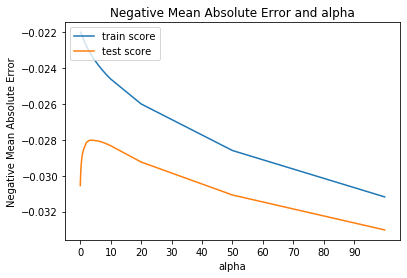

In [129]:
# plotting mean test and train scoes with alpha 
cv_results_rfe['param_alpha'] = cv_results_rfe['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xticks(np.arange(0, 100, 10))
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

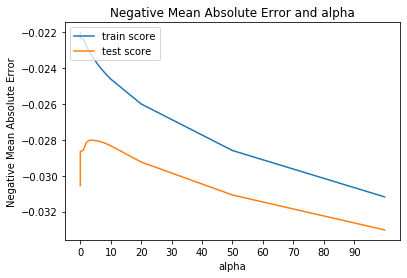

In [130]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xticks(np.arange(0, 100, 10))
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [131]:
alpha = 0.5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
ridge.coef_

array([ 0.31538355,  0.00211248,  0.09202759,  0.09094136,  0.08005938,
       -0.11359862, -0.11494572, -0.09462758, -0.06568353,  0.10705499,
        0.21681452,  0.25330742, -0.058328  ,  0.06093918, -0.07238684,
       -0.07012059, -0.01674142,  0.07768454])

In [132]:
X_train_rfe.columns

Index(['LotArea', 'BsmtUnfSF', '2ndFlrSF', '3SsnPorch', 'Street_Pave',
       'Condition2_Othr', 'OverallQual_2', 'OverallQual_3', 'OverallQual_4',
       'OverallQual_8', 'OverallQual_9', 'OverallQual_10', 'OverallCond_2',
       'FullBath_3', 'KitchenAbvGr_3', 'TotRmsAbvGrd_12', 'Fireplaces_3',
       'GarageCars_3'],
      dtype='object')

In [133]:
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-5.67995077e-03,  2.90371791e-02,  3.13668101e-02,  1.90649255e-02,
        1.07807694e-02,  7.20126113e-03,  2.23402696e-02,  5.28945039e-02,
        4.70033456e-02,  6.53968425e-03,  6.26087294e-02,  2.13335531e-02,
        1.94673718e-02,  3.95678323e-06,  9.30149544e-03,  2.39829775e-02,
        2.47705892e-02,  1.80412069e-02, -6.91771862e-03, -1.87894671e-02,
        4.69342819e-04,  8.22046046e-03, -1.85929026e-03, -6.01601237e-03,
        2.22676978e-03,  8.14711845e-03, -4.04911524e-04, -9.62620652e-03,
        4.84738833e-03, -5.06702716e-03, -1.42720709e-02, -9.37619495e-03,
        4.01278440e-03,  3.38457065e-03, -7.19418998e-03,  2.38524393e-02,
        1.04347130e-02, -4.39419524e-03, -1.40788789e-02, -3.10493101e-03,
        4.17758568e-03,  1.30331130e-02,  1.52948044e-02, -1.20389791e-02,
       -8.50703160e-04, -2.66607963e-03,  1.04794909e-02, -1.77695347e-02,
       -3.30337143e-02, -1.10611478e-02,  8.93644343e-03, -4.48362137e-03,
       -6.15139116e-03, -

In [134]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'MoSold_6', 'MoSold_7', 'MoSold_8', 'MoSold_9', 'MoSold_10',
       'MoSold_11', 'MoSold_12', 'SaleType_Othr', 'SaleType_WD',
       'SaleCondition_Othr'],
      dtype='object', length=176)

In [135]:
print('GrLivArea: ',list(ridge.coef_)[list(X_train.columns).index('GrLivArea')])
print('TotalBsmtSF: ',list(ridge.coef_)[list(X_train.columns).index('TotalBsmtSF')])
print('ExterQual_TA: ',list(ridge.coef_)[list(X_train.columns).index('ExterQual_TA')])
print('GarageCars_3: ',list(ridge.coef_)[list(X_train.columns).index('GarageCars_3')])
print('CentralAir_Y: ',list(ridge.coef_)[list(X_train.columns).index('CentralAir_Y')])
print('BsmtFinSF1: ',list(ridge.coef_)[list(X_train.columns).index('BsmtFinSF1')])
print('FullBath_3: ',list(ridge.coef_)[list(X_train.columns).index('FullBath_3')])
print('Foundation_PConc: ',list(ridge.coef_)[list(X_train.columns).index('Foundation_PConc')])
print('FireplaceQu_NA: ',list(ridge.coef_)[list(X_train.columns).index('FireplaceQu_NA')])
print('OverallQual_9: ',list(ridge.coef_)[list(X_train.columns).index('OverallQual_9')])

GrLivArea:  0.06260872941769344
TotalBsmtSF:  0.022340269581157642
ExterQual_TA:  -0.016088470566640475
GarageCars_3:  0.03608514342715273
CentralAir_Y:  0.016042408119851633
BsmtFinSF1:  0.0190649254723857
FullBath_3:  0.03423008448557124
Foundation_PConc:  0.0019464996120234978
FireplaceQu_NA:  -0.005328008421121671
OverallQual_9:  0.06642957844611287


## Lasso

In [136]:
lasso = Lasso()

# cross validation
model_cv_rfe = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_rfe.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [137]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [138]:
cv_results_rfe = pd.DataFrame(model_cv_rfe.cv_results_)
cv_results_rfe.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0           0.01          0.00             0.00            0.00        0.00   
1           0.01          0.00             0.00            0.00        0.00   
2           0.00          0.00             0.00            0.00        0.01   
3           0.00          0.00             0.00            0.00        0.05   
4           0.00          0.00             0.00            0.00        0.10   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}              -0.05              -0.04              -0.05   
1   {'alpha': 0.001}              -0.06              -0.05              -0.05   
2    {'alpha': 0.01}              -0.08              -0.07              -0.07   
3    {'alpha': 0.05}              -0.09              -0.08              -0.08   
4     {'alpha': 0.1}              -0.09              -0.08              -0.08   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0              -0.04  ...            -0.05            0.00                1   
1              -0.05  ...            -0.05            0.00                2   
2              -0.06  ...            -0.07            0.00                3   
3              -0.08  ...            -0.08            0.00                4   
4              -0.08  ...            -0.08            0.00                4   

   split0_train_score  split1_train_score  split2_train_score  \
0               -0.04               -0.05               -0.04   
1               -0.05               -0.05               -0.05   
2               -0.07               -0.07               -0.07   
3               -0.08               -0.08               -0.08   
4               -0.08               -0.08               -0.08   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0               -0.05               -0.05             -0.04             0.00  
1               -0.05               -0.05             -0.05             0.00  
2               -0.07               -0.07             -0.07             0.00  
3               -0.08               -0.08             -0.08             0.00  
4               -0.08               -0.08             -0.08             0.00  

[5 rows x 21 columns]

In [139]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0           0.03          0.01             0.00            0.00        0.00   
1           0.01          0.00             0.00            0.00        0.00   
2           0.01          0.00             0.00            0.00        0.01   
3           0.01          0.00             0.00            0.00        0.05   
4           0.01          0.00             0.00            0.00        0.10   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}              -0.03              -0.03              -0.03   
1   {'alpha': 0.001}              -0.03              -0.03              -0.03   
2    {'alpha': 0.01}              -0.05              -0.05              -0.05   
3    {'alpha': 0.05}              -0.09              -0.08              -0.08   
4     {'alpha': 0.1}              -0.09              -0.08              -0.08   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0              -0.02  ...            -0.03            0.00                1   
1              -0.03  ...            -0.03            0.00                2   
2              -0.05  ...            -0.05            0.00                3   
3              -0.08  ...            -0.08            0.00                4   
4              -0.08  ...            -0.08            0.00                4   

   split0_train_score  split1_train_score  split2_train_score  \
0               -0.02               -0.02               -0.02   
1               -0.03               -0.03               -0.03   
2               -0.05               -0.05               -0.05   
3               -0.08               -0.08               -0.08   
4               -0.08               -0.08               -0.08   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0               -0.02               -0.02             -0.02             0.00  
1               -0.03               -0.03             -0.03             0.00  
2               -0.05               -0.05             -0.05             0.00  
3               -0.08               -0.08             -0.08             0.00  
4               -0.08               -0.08             -0.08             0.00  

[5 rows x 21 columns]

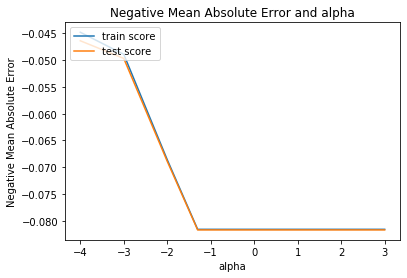

In [140]:
# plotting mean test and train scoes with alpha 
cv_results_rfe['param_alpha'] = cv_results_rfe['param_alpha'].astype('float32')

# plotting
plt.plot(np.log10(cv_results_rfe['param_alpha']), cv_results_rfe['mean_train_score'])
plt.plot(np.log10(cv_results_rfe['param_alpha']), cv_results_rfe['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

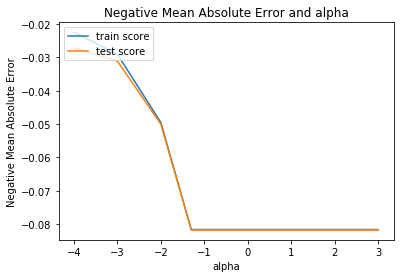

In [141]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(np.log10(cv_results['param_alpha']), cv_results['mean_train_score'])
plt.plot(np.log10(cv_results['param_alpha']), cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [142]:
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [143]:
lasso.coef_

array([ 0.33228152,  0.        ,  0.09071384,  0.07933301,  0.07276316,
       -0.10564522, -0.09299106, -0.09065414, -0.06486848,  0.10776509,
        0.21759188,  0.25354522, -0.0337803 ,  0.0569648 , -0.0058443 ,
       -0.06063751, -0.        ,  0.07703835])

In [144]:
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [145]:
lasso.coef_

array([-0.00000000e+00,  6.96892777e-02,  1.97619819e-02,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  2.98813013e-01,  0.00000000e+00,
        1.61469563e-02, -0.00000000e+00,  0.00000000e+00,  2.54676280e-02,
        2.69427191e-02,  0.00000000e+00, -0.00000000e+00, -1.57517245e-02,
        0.00000000e+00,  3.09558258e-03, -0.00000000e+00, -1.23428876e-03,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -9.74768811e-04,
        0.00000000e+00, -0.00000000e+00, -7.49127348e-03, -0.00000000e+00,
        0.00000000e+00,  2.37340808e-03, -7.34177376e-03,  2.10072054e-02,
        3.86386993e-03, -3.80364159e-03, -1.38311214e-02, -1.82191096e-03,
        4.15840796e-03,  1.05727114e-02,  4.12296940e-03, -1.04457748e-02,
       -0.00000000e+00, -3.06911162e-04,  1.07101163e-02, -1.73504821e-02,
       -5.65303372e-02, -1.27158234e-02,  1.46389411e-02, -1.14036534e-03,
       -0.00000000e+00, -

## Elastic Net

In [146]:
elasticnet = ElasticNet()

# cross validation
model_cv_rfe = GridSearchCV(estimator = elasticnet, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_rfe.fit(X_train_rfe, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [147]:
elasticnet = ElasticNet()

# cross validation
model_cv = GridSearchCV(estimator = elasticnet, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [148]:
cv_results_rfe = pd.DataFrame(model_cv_rfe.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0           0.03          0.01             0.00            0.00         0.00   
1           0.01          0.00             0.00            0.00         0.00   
2           0.01          0.00             0.00            0.00         0.01   
3           0.01          0.00             0.00            0.00         0.05   
4           0.01          0.00             0.00            0.00         0.10   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}              -0.03              -0.03              -0.03   
1   {'alpha': 0.001}              -0.03              -0.03              -0.03   
2    {'alpha': 0.01}              -0.05              -0.05              -0.05   
3    {'alpha': 0.05}              -0.09              -0.08              -0.08   
4     {'alpha': 0.1}              -0.09              -0.08              -0.08   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0              -0.02  ...            -0.03            0.00                1   
1              -0.03  ...            -0.03            0.00                2   
2              -0.05  ...            -0.05            0.00                3   
3              -0.08  ...            -0.08            0.00                4   
4              -0.08  ...            -0.08            0.00                4   

   split0_train_score  split1_train_score  split2_train_score  \
0               -0.02               -0.02               -0.02   
1               -0.03               -0.03               -0.03   
2               -0.05               -0.05               -0.05   
3               -0.08               -0.08               -0.08   
4               -0.08               -0.08               -0.08   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0               -0.02               -0.02             -0.02             0.00  
1               -0.03               -0.03             -0.03             0.00  
2               -0.05               -0.05             -0.05             0.00  
3               -0.08               -0.08             -0.08             0.00  
4               -0.08               -0.08             -0.08             0.00  

[5 rows x 21 columns]

In [149]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0           0.07          0.01             0.00            0.00        0.00   
1           0.02          0.00             0.00            0.00        0.00   
2           0.01          0.00             0.00            0.00        0.01   
3           0.01          0.00             0.00            0.00        0.05   
4           0.01          0.00             0.00            0.00        0.10   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}              -0.03              -0.03              -0.03   
1   {'alpha': 0.001}              -0.03              -0.03              -0.03   
2    {'alpha': 0.01}              -0.05              -0.04              -0.04   
3    {'alpha': 0.05}              -0.08              -0.07              -0.07   
4     {'alpha': 0.1}              -0.09              -0.08              -0.08   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0              -0.02  ...            -0.03            0.00                1   
1              -0.03  ...            -0.03            0.00                2   
2              -0.04  ...            -0.04            0.00                3   
3              -0.07  ...            -0.07            0.00                4   
4              -0.08  ...            -0.08            0.00                5   

   split0_train_score  split1_train_score  split2_train_score  \
0               -0.02               -0.02               -0.02   
1               -0.02               -0.03               -0.03   
2               -0.04               -0.04               -0.04   
3               -0.07               -0.07               -0.07   
4               -0.08               -0.08               -0.08   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0               -0.02               -0.02             -0.02             0.00  
1               -0.03               -0.03             -0.03             0.00  
2               -0.04               -0.04             -0.04             0.00  
3               -0.07               -0.07             -0.07             0.00  
4               -0.08               -0.08             -0.08             0.00  

[5 rows x 21 columns]

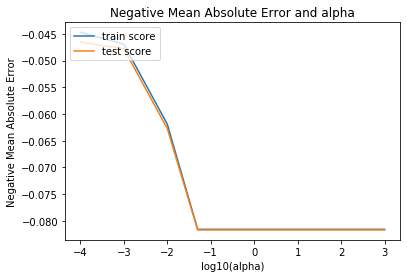

In [150]:
# plotting mean test and train scoes with alpha 
cv_results_rfe['param_alpha'] = cv_results_rfe['param_alpha'].astype('float32')

# plotting
plt.plot(np.log10(cv_results_rfe['param_alpha']), cv_results_rfe['mean_train_score'])
plt.plot(np.log10(cv_results_rfe['param_alpha']), cv_results_rfe['mean_test_score'])
plt.xlabel('log10(alpha)')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

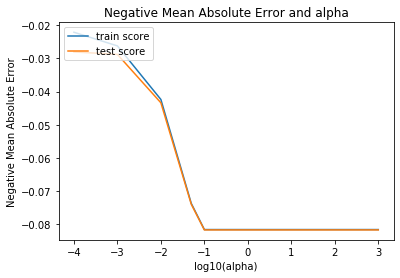

In [151]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(np.log10(cv_results['param_alpha']), cv_results['mean_train_score'])
plt.plot(np.log10(cv_results['param_alpha']), cv_results['mean_test_score'])
plt.xlabel('log10(alpha)')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [152]:
alpha = 0.0001

elasticnet = ElasticNet(alpha=alpha)
        
elasticnet.fit(X_train_rfe, y_train) 

ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [153]:
elasticnet.coef_

array([ 0.34717786,  0.00106206,  0.09161974,  0.08862837,  0.08194293,
       -0.11437879, -0.11523289, -0.09335056, -0.06520144,  0.10800422,
        0.21927262,  0.25798486, -0.05006013,  0.05856104, -0.05434005,
       -0.07029082, -0.00951447,  0.07629477])

In [154]:
alpha = 0.0001

elasticnet = ElasticNet(alpha=alpha)
        
elasticnet.fit(X_train, y_train) 

ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [155]:
elasticnet.coef_

array([-2.08696005e-02,  9.22372174e-02,  2.71606317e-02,  0.00000000e+00,
        5.15159170e-03, -5.69833639e-03,  0.00000000e+00,  5.31351875e-02,
        3.21690381e-02, -0.00000000e+00,  2.45968211e-01,  0.00000000e+00,
        1.75657859e-02, -1.57185925e-03,  2.25706282e-03,  4.01215758e-02,
        3.16002811e-02,  1.90258648e-02, -0.00000000e+00, -1.62953416e-02,
        0.00000000e+00,  8.55472049e-03,  0.00000000e+00, -3.69955701e-03,
       -0.00000000e+00, -0.00000000e+00,  3.44766421e-03, -7.77500802e-04,
        2.34177994e-03, -8.60353162e-03, -1.85306942e-02, -7.35411004e-03,
        0.00000000e+00,  6.89325440e-04, -9.24878298e-03,  3.44952544e-02,
        4.75290918e-03, -3.80951850e-03, -1.57988961e-02, -2.36027709e-03,
        3.15414813e-03,  1.47588526e-02,  5.68299539e-03, -1.22138054e-02,
       -9.39818233e-04, -2.57962155e-03,  9.88504379e-03, -1.69459259e-02,
       -6.78417551e-02, -5.06550476e-03,  1.74911825e-02, -4.46569751e-04,
        0.00000000e+00, -

## Forward Feature Selection

In [156]:
def calculate_aic(n, mse, num_params):
    aic = n * np.log(mse) + 2 * num_params
    return aic

def calculate_bic(n, mse, num_params):
    bic = n * np.log(mse) + np.log(n) * num_params
    return bic

In [157]:
features = X_train_rfe.columns

regression = Ridge(alpha=5)

selected_features = []
min_aic = np.inf
for step in range(0, 10, 1):
    for feature in features:
        testing_features = selected_features + [feature]
        regression.fit(X_train_rfe[testing_features], y_train)
        y_pred = regression.predict(X_test[testing_features])
        mse = metrics.mean_squared_error(y_test, y_pred)
        num_params = len(regression.coef_) + 1  # features and intercept
        n = X_train_rfe.shape[0]
        aic = calculate_aic(n, mse, num_params)
        bic = calculate_bic(n, mse, num_params)
        if aic < min_aic:
            min_aic = aic
            current_bic = bic
            best_feature = feature
    selected_features = selected_features + [best_feature]
    print("Selected features: ", selected_features, "\nAIC: ", min_aic, "\nBIC: ", current_bic)

y_pred = regression.predict(X_test[selected_features])
print("\n\nFinal r-squared: ", metrics.r2_score(y_test, y_pred))

Selected features:  ['GarageCars_3'] 
AIC:  -4925.691283591147 
BIC:  -4915.845995808196
Selected features:  ['GarageCars_3', 'OverallQual_8'] 
AIC:  -5019.0919268594835 
BIC:  -5004.3239951850555
Selected features:  ['GarageCars_3', 'OverallQual_8', 'OverallQual_9'] 
AIC:  -5119.6607286827275 
BIC:  -5099.970153116824
Selected features:  ['GarageCars_3', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10'] 
AIC:  -5231.47356526665 
BIC:  -5206.860345809271
Selected features:  ['GarageCars_3', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10', '2ndFlrSF'] 
AIC:  -5318.560128808183 
BIC:  -5289.0242654593285
Selected features:  ['GarageCars_3', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10', '2ndFlrSF', 'OverallQual_4'] 
AIC:  -5376.678941915867 
BIC:  -5342.220434675535
Selected features:  ['GarageCars_3', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10', '2ndFlrSF', 'OverallQual_4', 'FullBath_3'] 
AIC:  -5420.910664209815 
BIC:  -5381.529513078008
Selected features:  ['GarageCar

In [158]:
features = X_train.columns

regression = Ridge(alpha=5)

selected_features = []
min_aic = np.inf
for step in range(0, 10, 1):
    for feature in features:
        testing_features = selected_features + [feature]
        regression.fit(X_train[testing_features], y_train)
        y_pred = regression.predict(X_test[testing_features])
        mse = metrics.mean_squared_error(y_test, y_pred)
        num_params = len(regression.coef_) + 1  # features and intercept
        n = X_train.shape[0]
        aic = calculate_aic(n, mse, num_params)
        bic = calculate_bic(n, mse, num_params)
        if aic < min_aic:
            min_aic = aic
            current_bic = bic
            best_feature = feature
    selected_features = selected_features + [best_feature]
    print("Selected features: ", selected_features, "\nAIC: ", min_aic, "\nBIC: ", current_bic)

y_pred = regression.predict(X_test[selected_features])
print("\n\nFinal r-squared: ", metrics.r2_score(y_test, y_pred))

Selected features:  ['GrLivArea'] 
AIC:  -4995.829874208225 
BIC:  -4985.984586425274
Selected features:  ['GrLivArea', 'ExterQual_TA'] 
AIC:  -5323.0919378299 
BIC:  -5308.3240061554725
Selected features:  ['GrLivArea', 'ExterQual_TA', 'GarageCars_3'] 
AIC:  -5560.709634285949 
BIC:  -5541.019058720045
Selected features:  ['GrLivArea', 'ExterQual_TA', 'GarageCars_3', 'BsmtFinSF1'] 
AIC:  -5693.024918713396 
BIC:  -5668.411699256017
Selected features:  ['GrLivArea', 'ExterQual_TA', 'GarageCars_3', 'BsmtFinSF1', 'CentralAir_Y'] 
AIC:  -5772.222594910378 
BIC:  -5742.686731561523
Selected features:  ['GrLivArea', 'ExterQual_TA', 'GarageCars_3', 'BsmtFinSF1', 'CentralAir_Y', 'TotalBsmtSF'] 
AIC:  -5835.724064992752 
BIC:  -5801.26555775242
Selected features:  ['GrLivArea', 'ExterQual_TA', 'GarageCars_3', 'BsmtFinSF1', 'CentralAir_Y', 'TotalBsmtSF', 'FullBath_3'] 
AIC:  -5893.832921009775 
BIC:  -5854.451769877968
Selected features:  ['GrLivArea', 'ExterQual_TA', 'GarageCars_3', 'BsmtFinSF

We are able to Derive the following through ***Ridge()*** Regression and ***Forward Feature Selection*** Method :-
- **R Sqaured** - **0.79**
- **alpha Param** - **5**

House Price is *Mostly* Driven By:-

**Features:-**
- GrLivArea - ***Above grade (ground) living area square feet***
- ExterQual_TA - ***Quality of the material on the exterior - *Average/Typical****
- GarageCars_3 - ***Garage Capacity - 3***
- BsmtFinSF1 - ***Type 1 finished square feet***
- CentralAir_Y - ***Central Air Condition - *Available****
- TotalBsmtSF - ***Total square feet of basement area***
- FullBath_3 - ***Full bathrooms above grade***
- FireplaceQu_NA - ***No* Fireplace***
- Foundation_PConc - ***Type of foundation - *Poured Contrete****
- OverallQual_9 - ***Overall material and finish of the house - *Excellent****

In [159]:
print('GrLivArea: ',list(ridge.coef_)[list(X_train.columns).index('GrLivArea')])
print('ExterQual_TA: ',list(ridge.coef_)[list(X_train.columns).index('ExterQual_TA')])
print('GarageCars_3: ',list(ridge.coef_)[list(X_train.columns).index('GarageCars_3')])
print('BsmtFinSF1: ',list(ridge.coef_)[list(X_train.columns).index('BsmtFinSF1')])
print('CentralAir_Y: ',list(ridge.coef_)[list(X_train.columns).index('CentralAir_Y')])
print('TotalBsmtSF: ',list(ridge.coef_)[list(X_train.columns).index('TotalBsmtSF')])
print('FullBath_3: ',list(ridge.coef_)[list(X_train.columns).index('FullBath_3')])
print('FireplaceQu_NA: ',list(ridge.coef_)[list(X_train.columns).index('FireplaceQu_NA')])
print('Foundation_PConc: ',list(ridge.coef_)[list(X_train.columns).index('Foundation_PConc')])
print('OverallQual_9: ',list(ridge.coef_)[list(X_train.columns).index('OverallQual_9')])

GrLivArea:  0.06260872941769344
ExterQual_TA:  -0.016088470566640475
GarageCars_3:  0.03608514342715273
BsmtFinSF1:  0.0190649254723857
CentralAir_Y:  0.016042408119851633
TotalBsmtSF:  0.022340269581157642
FullBath_3:  0.03423008448557124
FireplaceQu_NA:  -0.005328008421121671
Foundation_PConc:  0.0019464996120234978
OverallQual_9:  0.06642957844611287


In [160]:
features = X_train_rfe.columns

regression = Lasso(alpha=0.0001)

selected_features = []
min_aic = np.inf
for step in range(0, 10, 1):
    for feature in features:
        testing_features = selected_features + [feature]
        regression.fit(X_train_rfe[testing_features], y_train)
        y_pred = regression.predict(X_test[testing_features])
        mse = metrics.mean_absolute_error(y_test, y_pred)
        num_params = len(regression.coef_) + 1  # features and intercept
        n = X_train_rfe.shape[0]
        aic = calculate_aic(n, mse, num_params)
        bic = calculate_bic(n, mse, num_params)
        if aic < min_aic:
            min_aic = aic
            current_bic = bic
            best_feature = feature
    selected_features = selected_features + [best_feature]
    print("Selected features: ", selected_features, "\nAIC: ", min_aic, "\nBIC: ", current_bic)

y_pred = regression.predict(X_test[selected_features])
print("\n\nFinal r-squared: ", metrics.r2_score(y_test, y_pred))

Selected features:  ['GarageCars_3'] 
AIC:  -2777.5829785492165 
BIC:  -2767.7376907662647
Selected features:  ['GarageCars_3', 'OverallQual_8'] 
AIC:  -2838.080041325697 
BIC:  -2823.3121096512696
Selected features:  ['GarageCars_3', 'OverallQual_8', 'OverallQual_9'] 
AIC:  -2886.335673254669 
BIC:  -2866.6450976887654
Selected features:  ['GarageCars_3', 'OverallQual_8', 'OverallQual_9', '2ndFlrSF'] 
AIC:  -2936.710467575377 
BIC:  -2912.097248117998
Selected features:  ['GarageCars_3', 'OverallQual_8', 'OverallQual_9', '2ndFlrSF', 'LotArea'] 
AIC:  -2982.5286645370998 
BIC:  -2952.9928011882444
Selected features:  ['GarageCars_3', 'OverallQual_8', 'OverallQual_9', '2ndFlrSF', 'LotArea', 'OverallQual_4'] 
AIC:  -3026.8220600994864 
BIC:  -2992.3635528591553
Selected features:  ['GarageCars_3', 'OverallQual_8', 'OverallQual_9', '2ndFlrSF', 'LotArea', 'OverallQual_4', 'OverallQual_10'] 
AIC:  -3058.032368253701 
BIC:  -3018.6512171218938
Selected features:  ['GarageCars_3', 'OverallQua

In [161]:
features = X_train.columns

regression = Lasso(alpha=0.0001)

selected_features = []
min_aic = np.inf
for step in range(0, 10, 1):
    for feature in features:
        testing_features = selected_features + [feature]
        regression.fit(X_train[testing_features], y_train)
        y_pred = regression.predict(X_test[testing_features])
        mse = metrics.mean_absolute_error(y_test, y_pred)
        num_params = len(regression.coef_) + 1  # features and intercept
        n = X_train.shape[0]
        aic = calculate_aic(n, mse, num_params)
        bic = calculate_bic(n, mse, num_params)
        if aic < min_aic:
            min_aic = aic
            current_bic = bic
            best_feature = feature
    selected_features = selected_features + [best_feature]
    print("Selected features: ", selected_features, "\nAIC: ", min_aic, "\nBIC: ", current_bic)

y_pred = regression.predict(X_test[selected_features])
print("\n\nFinal r-squared: ", metrics.r2_score(y_test, y_pred))

Selected features:  ['GrLivArea'] 
AIC:  -2919.353524888946 
BIC:  -2909.5082371059943
Selected features:  ['GrLivArea', 'TotalBsmtSF'] 
AIC:  -3112.0039568548987 
BIC:  -3097.236025180471
Selected features:  ['GrLivArea', 'TotalBsmtSF', 'Foundation_PConc'] 
AIC:  -3263.12784594246 
BIC:  -3243.4372703765566
Selected features:  ['GrLivArea', 'TotalBsmtSF', 'Foundation_PConc', 'GarageCars_3'] 
AIC:  -3326.3785349654972 
BIC:  -3301.765315508118
Selected features:  ['GrLivArea', 'TotalBsmtSF', 'Foundation_PConc', 'GarageCars_3', 'BsmtUnfSF'] 
AIC:  -3366.8319387021497 
BIC:  -3337.2960753532943
Selected features:  ['GrLivArea', 'TotalBsmtSF', 'Foundation_PConc', 'GarageCars_3', 'BsmtUnfSF', 'ExterQual_TA'] 
AIC:  -3405.262225365566 
BIC:  -3370.803718125235
Selected features:  ['GrLivArea', 'TotalBsmtSF', 'Foundation_PConc', 'GarageCars_3', 'BsmtUnfSF', 'ExterQual_TA', 'BldgType_Othr'] 
AIC:  -3429.4345851022945 
BIC:  -3390.0534339704873
Selected features:  ['GrLivArea', 'TotalBsmtSF', 

We are able to Derive the following through ***Lasso()*** Regression and ***Forward Feature Selection*** Method :-
- **R Sqaured** - **0.80**
- **alpha Param** - **0.0001**

House Price is *Mostly* Driven By:-

**Features:-**
- GrLivArea - ***Above grade (ground) living area square feet***
- TotalBsmtSF - ***Total square feet of basement area***
- Foundation_PConc - ***Type of foundation - *Poured Contrete****
- GarageCars_3 - ***Garage Capacity - 3***
- BsmtUnfSF - ***Basement Unfinished square feet***
- ExterQual_TA - ***Quality of the material on the exterior - *Average/Typical****
- BldgType_Othr - ***Building Type***
- FireplaceQu_NA - ***No* Fireplace***
- Functional_Typ - ***Home functionality (Assume typical unless deductions are warranted) - Typical***
- CentralAir_Y - ***Central Air Condition - *Available****

In [162]:
print('GrLivArea: ',list(lasso.coef_)[list(X_train.columns).index('GrLivArea')])
print('TotalBsmtSF: ',list(lasso.coef_)[list(X_train.columns).index('TotalBsmtSF')])
print('Foundation_PConc: ',list(lasso.coef_)[list(X_train.columns).index('Foundation_PConc')])
print('GarageCars_3: ',list(lasso.coef_)[list(X_train.columns).index('GarageCars_3')])
print('BsmtUnfSF: ',list(lasso.coef_)[list(X_train.columns).index('BsmtUnfSF')])
print('ExterQual_TA: ',list(lasso.coef_)[list(X_train.columns).index('ExterQual_TA')])
print('BldgType_Othr: ',list(lasso.coef_)[list(X_train.columns).index('BldgType_Othr')])
print('FireplaceQu_NA: ',list(lasso.coef_)[list(X_train.columns).index('FireplaceQu_NA')])
print('Functional_Typ: ',list(lasso.coef_)[list(X_train.columns).index('Functional_Typ')])
print('CentralAir_Y: ',list(lasso.coef_)[list(X_train.columns).index('CentralAir_Y')])

GrLivArea:  0.2988130126004392
TotalBsmtSF:  0.0
Foundation_PConc:  0.0020296719282216903
GarageCars_3:  0.04260121169652393
BsmtUnfSF:  -0.0
ExterQual_TA:  -0.014137342315990705
BldgType_Othr:  -0.012715823444202915
FireplaceQu_NA:  -0.00270059371183498
Functional_Typ:  0.01317824461728875
CentralAir_Y:  0.013142109521475773


In [163]:
features = X_train_rfe.columns

regression = ElasticNet(alpha=0.001)

selected_features = []
min_aic = np.inf
for step in range(0, 10, 1):
    for feature in features:
        testing_features = selected_features + [feature]
        regression.fit(X_train_rfe[testing_features], y_train)
        y_pred = regression.predict(X_test[testing_features])
        mse = metrics.mean_squared_error(y_test, y_pred)
        num_params = len(regression.coef_) + 1  # features and intercept
        n = X_train_rfe.shape[0]
        aic = calculate_aic(n, mse, num_params)
        bic = calculate_bic(n, mse, num_params)
        if aic < min_aic:
            min_aic = aic
            current_bic = bic
            best_feature = feature
    selected_features = selected_features + [best_feature]
    print("Selected features: ", selected_features, "\nAIC: ", min_aic, "\nBIC: ", current_bic)

y_pred = regression.predict(X_test[selected_features])
print("\n\nFinal r-squared: ", metrics.r2_score(y_test, y_pred))

Selected features:  ['GarageCars_3'] 
AIC:  -4927.576896848928 
BIC:  -4917.731609065977
Selected features:  ['GarageCars_3', 'OverallQual_8'] 
AIC:  -5019.272480659692 
BIC:  -5004.504548985264
Selected features:  ['GarageCars_3', 'OverallQual_8', 'OverallQual_9'] 
AIC:  -5118.774593694451 
BIC:  -5099.0840181285475
Selected features:  ['GarageCars_3', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10'] 
AIC:  -5243.304040223762 
BIC:  -5218.690820766383
Selected features:  ['GarageCars_3', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10', '2ndFlrSF'] 
AIC:  -5330.038386382426 
BIC:  -5300.502523033571
Selected features:  ['GarageCars_3', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10', '2ndFlrSF', 'OverallQual_4'] 
AIC:  -5388.3661271858555 
BIC:  -5353.907619945524
Selected features:  ['GarageCars_3', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10', '2ndFlrSF', 'OverallQual_4', 'LotArea'] 
AIC:  -5429.580812738114 
BIC:  -5390.199661606307
Selected features:  ['GarageCars_3'

In [164]:
features = X_train.columns

regression = ElasticNet(alpha=0.0001)

selected_features = []
min_aic = np.inf
for step in range(0, 10, 1):
    for feature in features:
        testing_features = selected_features + [feature]
        regression.fit(X_train[testing_features], y_train)
        y_pred = regression.predict(X_test[testing_features])
        mse = metrics.mean_squared_error(y_test, y_pred)
        num_params = len(regression.coef_) + 1  # features and intercept
        n = X_train.shape[0]
        aic = calculate_aic(n, mse, num_params)
        bic = calculate_bic(n, mse, num_params)
        if aic < min_aic:
            min_aic = aic
            current_bic = bic
            best_feature = feature
    selected_features = selected_features + [best_feature]
    print("Selected features: ", selected_features, "\nAIC: ", min_aic, "\nBIC: ", current_bic)

y_pred = regression.predict(X_test[selected_features])
print("\n\nFinal r-squared: ", metrics.r2_score(y_test, y_pred))

Selected features:  ['GrLivArea'] 
AIC:  -5107.632966038486 
BIC:  -5097.787678255535
Selected features:  ['GrLivArea', 'TotalBsmtSF'] 
AIC:  -5461.82062492932 
BIC:  -5447.052693254892
Selected features:  ['GrLivArea', 'TotalBsmtSF', 'ExterQual_TA'] 
AIC:  -5706.781623141446 
BIC:  -5687.091047575543
Selected features:  ['GrLivArea', 'TotalBsmtSF', 'ExterQual_TA', 'GarageCars_3'] 
AIC:  -5849.375886464617 
BIC:  -5824.762667007238
Selected features:  ['GrLivArea', 'TotalBsmtSF', 'ExterQual_TA', 'GarageCars_3', 'CentralAir_Y'] 
AIC:  -5922.999290633245 
BIC:  -5893.4634272843905
Selected features:  ['GrLivArea', 'TotalBsmtSF', 'ExterQual_TA', 'GarageCars_3', 'CentralAir_Y', 'BsmtFinSF1'] 
AIC:  -5980.970891343303 
BIC:  -5946.512384102972
Selected features:  ['GrLivArea', 'TotalBsmtSF', 'ExterQual_TA', 'GarageCars_3', 'CentralAir_Y', 'BsmtFinSF1', 'FullBath_3'] 
AIC:  -6033.379118971164 
BIC:  -5993.9979678393565
Selected features:  ['GrLivArea', 'TotalBsmtSF', 'ExterQual_TA', 'GarageC

In [165]:
# Doubling Aplpha Value 
features = X_train.columns

regression = Ridge(alpha=10)

selected_features = []
min_aic = np.inf
for step in range(0, 10, 1):
    for feature in features:
        testing_features = selected_features + [feature]
        regression.fit(X_train[testing_features], y_train)
        y_pred = regression.predict(X_test[testing_features])
        mse = metrics.mean_squared_error(y_test, y_pred)
        num_params = len(regression.coef_) + 1  # features and intercept
        n = X_train.shape[0]
        aic = calculate_aic(n, mse, num_params)
        bic = calculate_bic(n, mse, num_params)
        if aic < min_aic:
            min_aic = aic
            current_bic = bic
            best_feature = feature
    selected_features = selected_features + [best_feature]
    print("Selected features: ", selected_features, "\nAIC: ", min_aic, "\nBIC: ", current_bic)

y_pred = regression.predict(X_test[selected_features])
print("\n\nFinal r-squared: ", metrics.r2_score(y_test, y_pred))

Selected features:  ['GarageCars_3'] 
AIC:  -4919.873317305665 
BIC:  -4910.028029522714
Selected features:  ['GarageCars_3', 'GrLivArea'] 
AIC:  -5240.575278232099 
BIC:  -5225.807346557671
Selected features:  ['GarageCars_3', 'GrLivArea', 'ExterQual_TA'] 
AIC:  -5479.525421387354 
BIC:  -5459.8348458214505
Selected features:  ['GarageCars_3', 'GrLivArea', 'ExterQual_TA', '1stFlrSF'] 
AIC:  -5583.013569449057 
BIC:  -5558.400349991678
Selected features:  ['GarageCars_3', 'GrLivArea', 'ExterQual_TA', '1stFlrSF', 'CentralAir_Y'] 
AIC:  -5665.478509073439 
BIC:  -5635.9426457245845
Selected features:  ['GarageCars_3', 'GrLivArea', 'ExterQual_TA', '1stFlrSF', 'CentralAir_Y', 'GrLivArea'] 
AIC:  -5730.126826577062 
BIC:  -5695.668319336731
Selected features:  ['GarageCars_3', 'GrLivArea', 'ExterQual_TA', '1stFlrSF', 'CentralAir_Y', 'GrLivArea', 'BsmtFinSF1'] 
AIC:  -5793.5577264546455 
BIC:  -5754.176575322838
Selected features:  ['GarageCars_3', 'GrLivArea', 'ExterQual_TA', '1stFlrSF', 'C

We are able to Derive the following through ***Ridge()*** Regression and ***Forward Feature Selection*** Method :-
- **R Sqaured** - **0.77**
- **alpha Param** - **10**

House Price is *Mostly* Driven By:-

**Features:-**
- GarageCars_3 - ***Garage Capacity - 3***
- GrLivArea - ***Above grade (ground) living area square feet***
- ExterQual_TA - ***Quality of the material on the exterior - *Average/Typical****
- 1stFlrSF - 1st Floor Square feet Area
- CentralAir_Y - ***Central Air Condition - *Available****
- BsmtFinSF1 - ***Type 1 finished square feet***
- FullBath_3 - ***Full bathrooms above grade***
- Foundation_PConc - ***Type of foundation - *Poured Contrete****
- TotalBsmtSF - ***Total square feet of basement area***
- OverallQual_9 - ***Overall material and finish of the house - *Excellent****

In [166]:
print('GarageCars_3: ',list(ridge.coef_)[list(X_train.columns).index('GarageCars_3')])
print('GrLivArea: ',list(ridge.coef_)[list(X_train.columns).index('GrLivArea')])
print('ExterQual_TA: ',list(ridge.coef_)[list(X_train.columns).index('ExterQual_TA')])
print('1stFlrSF: ',list(ridge.coef_)[list(X_train.columns).index('1stFlrSF')])
print('CentralAir_Y: ',list(ridge.coef_)[list(X_train.columns).index('CentralAir_Y')])
print('BsmtFinSF1: ',list(ridge.coef_)[list(X_train.columns).index('BsmtFinSF1')])
print('FullBath_3: ',list(ridge.coef_)[list(X_train.columns).index('FullBath_3')])
print('Foundation_PConc: ',list(ridge.coef_)[list(X_train.columns).index('Foundation_PConc')])
print('TotalBsmtSF: ',list(ridge.coef_)[list(X_train.columns).index('TotalBsmtSF')])
print('OverallQual_9: ',list(ridge.coef_)[list(X_train.columns).index('OverallQual_9')])

GarageCars_3:  0.03608514342715273
GrLivArea:  0.06260872941769344
ExterQual_TA:  -0.016088470566640475
1stFlrSF:  0.0528945039400743
CentralAir_Y:  0.016042408119851633
BsmtFinSF1:  0.0190649254723857
FullBath_3:  0.03423008448557124
Foundation_PConc:  0.0019464996120234978
TotalBsmtSF:  0.022340269581157642
OverallQual_9:  0.06642957844611287


In [167]:
# Doubling the Aplpha
features = X_train.columns

regression = Lasso(alpha=0.0002)

selected_features = []
min_aic = np.inf
for step in range(0, 10, 1):
    for feature in features:
        testing_features = selected_features + [feature]
        regression.fit(X_train[testing_features], y_train)
        y_pred = regression.predict(X_test[testing_features])
        mse = metrics.mean_squared_error(y_test, y_pred)
        num_params = len(regression.coef_) + 1  # features and intercept
        n = X_train.shape[0]
        aic = calculate_aic(n, mse, num_params)
        bic = calculate_bic(n, mse, num_params)
        if aic < min_aic:
            min_aic = aic
            current_bic = bic
            best_feature = feature
    selected_features = selected_features + [best_feature]
    print("Selected features: ", selected_features, "\nAIC: ", min_aic, "\nBIC: ", current_bic)

y_pred = regression.predict(X_test[selected_features])
print("\n\nFinal r-squared: ", metrics.r2_score(y_test, y_pred))

Selected features:  ['GrLivArea'] 
AIC:  -5105.640814168199 
BIC:  -5095.795526385247
Selected features:  ['GrLivArea', 'TotalBsmtSF'] 
AIC:  -5448.438183687868 
BIC:  -5433.67025201344
Selected features:  ['GrLivArea', 'TotalBsmtSF', 'ExterQual_TA'] 
AIC:  -5689.562508454943 
BIC:  -5669.871932889039
Selected features:  ['GrLivArea', 'TotalBsmtSF', 'ExterQual_TA', 'GarageCars_3'] 
AIC:  -5831.1734161954455 
BIC:  -5806.560196738066
Selected features:  ['GrLivArea', 'TotalBsmtSF', 'ExterQual_TA', 'GarageCars_3', 'CentralAir_Y'] 
AIC:  -5903.8870684100675 
BIC:  -5874.351205061213
Selected features:  ['GrLivArea', 'TotalBsmtSF', 'ExterQual_TA', 'GarageCars_3', 'CentralAir_Y', 'BsmtFinSF1'] 
AIC:  -5957.810932299383 
BIC:  -5923.352425059052
Selected features:  ['GrLivArea', 'TotalBsmtSF', 'ExterQual_TA', 'GarageCars_3', 'CentralAir_Y', 'BsmtFinSF1', 'FullBath_3'] 
AIC:  -6006.276951027964 
BIC:  -5966.895799896157
Selected features:  ['GrLivArea', 'TotalBsmtSF', 'ExterQual_TA', 'GarageC

We are able to Derive the following through ***Lasso()*** Regression and ***Forward Feature Selection*** Method :-
- **R Sqaured** - **0.81**
- **alpha Param** - **0.0002**

House Price is *Mostly* Driven By:-

**Features:-**
- GrLivArea - ***Above grade (ground) living area square feet***
- TotalBsmtSF - ***Total square feet of basement area***
- ExterQual_TA - ***Quality of the material on the exterior - *Average/Typical****
- GarageCars_3 - ***Garage Capacity - 3***
- CentralAir_Y - ***Central Air Condition - *Available****
- BsmtFinSF1 - *** Type 1 Basement Finished square feet***
- Full Bathroom - ***Full Bathroom - *3****
- Foundation_PConc - ***Type of foundation - *Poured Contrete****
- FireplaceQu_NA - ***No* Fireplace**
- OverallQual_9 - ***Rates the overall material and finish of the house - Excellent***

In [168]:
print('GrLivArea: ',list(lasso.coef_)[list(X_train.columns).index('GrLivArea')])
print('TotalBsmtSF: ',list(lasso.coef_)[list(X_train.columns).index('TotalBsmtSF')])
print('ExterQual_TA: ',list(lasso.coef_)[list(X_train.columns).index('ExterQual_TA')])
print('GarageCars_3: ',list(lasso.coef_)[list(X_train.columns).index('GarageCars_3')])
print('CentralAir_Y: ',list(lasso.coef_)[list(X_train.columns).index('CentralAir_Y')])
print('BsmtFinSF1: ',list(lasso.coef_)[list(X_train.columns).index('BsmtFinSF1')])
print('FullBath_3: ',list(lasso.coef_)[list(X_train.columns).index('FullBath_3')])
print('Foundation_PConc: ',list(lasso.coef_)[list(X_train.columns).index('Foundation_PConc')])
print('FireplaceQu_NA: ',list(lasso.coef_)[list(X_train.columns).index('FireplaceQu_NA')])
print('OverallQual_9: ',list(lasso.coef_)[list(X_train.columns).index('OverallQual_9')])

GrLivArea:  0.2988130126004392
TotalBsmtSF:  0.0
ExterQual_TA:  -0.014137342315990705
GarageCars_3:  0.04260121169652393
CentralAir_Y:  0.013142109521475773
BsmtFinSF1:  0.0
FullBath_3:  0.037687772941621345
Foundation_PConc:  0.0020296719282216903
FireplaceQu_NA:  -0.00270059371183498
OverallQual_9:  0.1188751209226189


#### Dropping Top Variables

In [169]:
drop_cols = X_train.filter(regex='GrLivArea|OverallQual|GarageCars|FullBath|CentralAir')
drop_cols= drop_cols.columns
drop_cols

Index(['GrLivArea', 'OverallQual_2', 'OverallQual_3', 'OverallQual_4',
       'OverallQual_5', 'OverallQual_6', 'OverallQual_7', 'OverallQual_8',
       'OverallQual_9', 'OverallQual_10', 'CentralAir_Y', 'BsmtFullBath_1',
       'BsmtFullBath_2', 'BsmtFullBath_3', 'FullBath_1', 'FullBath_2',
       'FullBath_3', 'GarageCars_1', 'GarageCars_2', 'GarageCars_3',
       'GarageCars_4'],
      dtype='object')

In [170]:
X_train.drop(list(drop_cols), axis=1, inplace=True)
X_test.drop(list(drop_cols), axis=1, inplace=True)

In [171]:
X_train.filter(drop_cols)

Empty DataFrame
Columns: []
Index: [801, 569, 1181, 808, 1095, 1166, 146, 1168, 406, 45, 1163, 770, 800, 160, 468, 554, 106, 1307, 1442, 1384, 421, 1446, 1315, 385, 1176, 1002, 604, 125, 720, 1316, 147, 1117, 700, 993, 853, 527, 51, 205, 562, 655, 713, 111, 1358, 841, 1079, 576, 859, 24, 402, 867, 462, 968, 156, 586, 1065, 517, 329, 862, 258, 621, 1182, 587, 1351, 674, 811, 1255, 1057, 547, 754, 1078, 267, 185, 105, 866, 1022, 1147, 1387, 1459, 536, 813, 883, 326, 564, 405, 1192, 594, 441, 1303, 1397, 177, 501, 390, 1270, 1355, 50, 1386, 155, 788, 828, 934, ...]

[1015 rows x 0 columns]

In [172]:
X_test.filter(drop_cols)

Empty DataFrame
Columns: []
Index: [357, 824, 369, 291, 134, 1436, 978, 173, 845, 170, 417, 1140, 759, 412, 533, 522, 540, 913, 12, 1333, 242, 101, 638, 1128, 342, 901, 939, 451, 922, 57, 30, 103, 634, 1127, 1391, 248, 228, 362, 1377, 1042, 981, 740, 225, 169, 345, 1008, 1177, 1058, 982, 711, 1009, 551, 1220, 814, 28, 278, 727, 560, 1394, 152, 928, 920, 686, 804, 731, 632, 749, 1361, 1067, 116, 223, 427, 628, 286, 1326, 1396, 1334, 1076, 1185, 191, 500, 118, 643, 1382, 823, 1414, 673, 659, 967, 480, 1104, 1157, 1454, 250, 1084, 1141, 1306, 1353, 245, 769, ...]

[436 rows x 0 columns]

In [173]:
from sklearn.linear_model import Lasso

In [174]:
Lasso = Lasso(alpha=0.0001)
Lasso.fit(X_train,y_train)
train_score=Lasso.score(X_train,y_train)
test_score=Lasso.score(X_test,y_test)
coeff_used = np.sum(Lasso.coef_!=0)
print("training score:", train_score)
print("test score: ", test_score)
print("number of features used: ", coeff_used)

training score: 0.8657215929931196
test score:  0.8390339639650867
number of features used:  110


In [175]:
from sklearn.linear_model import Lasso
features = X_train.columns

regression = Lasso(alpha=0.0001)

selected_features = []
min_aic = np.inf
for step in range(0, 20, 1):
    for feature in features:
        testing_features = selected_features + [feature]
        regression.fit(X_train[testing_features], y_train)
        y_pred = regression.predict(X_test[testing_features])
        mse = metrics.mean_squared_error(y_test, y_pred)
        num_params = len(regression.coef_) + 1  # features and intercept
        n = X_train.shape[0]
        aic = calculate_aic(n, mse, num_params)
        bic = calculate_bic(n, mse, num_params)
        if aic < min_aic:
            min_aic = aic
            current_bic = bic
            best_feature = feature
    selected_features = selected_features + [best_feature]
    print("Selected features: ", selected_features, "\nAIC: ", min_aic, "\nBIC: ", current_bic)

y_pred = regression.predict(X_test[selected_features])
print("\n\nFinal r-squared: ", metrics.r2_score(y_test, y_pred))

Selected features:  ['TotalBsmtSF'] 
AIC:  -4996.8069195296175 
BIC:  -4986.961631746666
Selected features:  ['TotalBsmtSF', '2ndFlrSF'] 
AIC:  -5371.8036121806235 
BIC:  -5357.035680506196
Selected features:  ['TotalBsmtSF', '2ndFlrSF', 'ExterQual_TA'] 
AIC:  -5581.443888441841 
BIC:  -5561.753312875938
Selected features:  ['TotalBsmtSF', '2ndFlrSF', 'ExterQual_TA', '1stFlrSF'] 
AIC:  -5717.2389667787265 
BIC:  -5692.625747321347
Selected features:  ['TotalBsmtSF', '2ndFlrSF', 'ExterQual_TA', '1stFlrSF', 'GarageArea'] 
AIC:  -5802.405310370329 
BIC:  -5772.869447021474
Selected features:  ['TotalBsmtSF', '2ndFlrSF', 'ExterQual_TA', '1stFlrSF', 'GarageArea', 'KitchenAbvGr_2'] 
AIC:  -5873.788090579667 
BIC:  -5839.329583339336
Selected features:  ['TotalBsmtSF', '2ndFlrSF', 'ExterQual_TA', '1stFlrSF', 'GarageArea', 'KitchenAbvGr_2', 'ExterQual_Othr'] 
AIC:  -5924.524186231481 
BIC:  -5885.143035099673
Selected features:  ['TotalBsmtSF', '2ndFlrSF', 'ExterQual_TA', '1stFlrSF', 'GarageAr

In [177]:
print('GarageArea: ',list(lasso.coef_)[list(X_train.columns).index('GarageArea')])
print('ExterQual_Othr: ',list(lasso.coef_)[list(X_train.columns).index('ExterQual_Othr')])
print('Foundation_PConc: ',list(lasso.coef_)[list(X_train.columns).index('Foundation_PConc')])
print('Functional_Typ: ',list(lasso.coef_)[list(X_train.columns).index('Functional_Typ')])
print('BsmtExposure_Gd: ',list(lasso.coef_)[list(X_train.columns).index('BsmtExposure_Gd')])

GarageArea:  0.2988130126004392
ExterQual_Othr:  0.00802383733989803
Foundation_PConc:  0.0029469826065495453
Functional_Typ:  0.005454708743363515
BsmtExposure_Gd:  -0.014137342315990705
